# Project: Investigate a Dataset - TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

Welcome to the Exploratory Data Analysis for the TMDb Movie Dataset! This script delves into the diverse world of movies, utilizing the extensive information provided in the dataset, which includes details about 10,000 movies collected from The Movie Database (TMDb). The dataset spans a range of features, from user ratings and revenue to genres, and cast information.

In this analysis, we aim to answer a series of insightful questions that will help us understand the trends, patterns, and relationships within the dataset. The script employs Python and popular data analysis libraries such as Pandas, Matplotlib, and Seaborn to visualize and interpret the data effectively.


### Question(s) for Analysis

 1. Which movies which had highest and lowest budgets?
 2. Which movies which had highest and lowest revenue?
 3. Which movies had highest and lowest profit?
 4. Which movies had the longest and shortest runtime? and How does it relate to revenue?
 5. Which genres are most popular from year to year?
 6. What kinds of properties are associated with movies that have high revenues? (Avg budget,Avg revenue, Average duration, Most frequent cast)
 7. What is the average runtime of the movies?
 8. Which year had the most profitable movies?

### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='wrangling'></a>
## Data Wrangling

Assessing and building intuition about the dataset

In [3]:
# Load your data and print out a few lines.

df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Checking the size of the dataframe

df.shape

(10866, 21)

In [5]:
# inspect data types and look instances of missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# Count of missing values per column

df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# Check duplicates in the data

df.duplicated()

sum(df.duplicated())

1

In [9]:
# Check the data type of release date

type(df['release_date'][0])

str

### Observation from the Dataset

1. 9 columns have missing values in the entries.
2. Currency in revenue and budget columns does not have a unit specified to differentiate from other sets of numbers.
3. Release date is a datetime type but it is structured as a string.
4. Only one duplicate is seen in the dataset.

## Data Cleaning

 - Remove unnecessary columns
 - Convert release date column from string to date format.
 - Removing the duplicate values.
 - Replacing zero with NAN in runtime column.
 - replace all the values from '0' to NAN in 'budget' and 'revenue' columns, then remove them.
 - Changing format of budget and revenue columns.

### Eliminating Irrelevant Columns

In streamlining the dataset for a more focused process flow, we will remove columns that are not integral to the analysis. The following columns will be excluded: id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count, and vote_average. This refinement aims to enhance the clarity and efficiency of subsequent analytical steps by retaining only the most pertinent information.

In [10]:
# List of columns to be dropped
columns_to_drop = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

# Removing specified columns from the dataframe
df = df.drop(columns=columns_to_drop)

# Displaying a preview of the updated dataframe
df.head()


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


#### Convert Release date column to Standard Date Format

In [11]:
df.release_date = pd.to_datetime(df['release_date'])

In [12]:
#Check the column in the dataset
df.head(4)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015


#### Remove duplicate Values

In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
# Check the number of records after removing duplicates

df.shape

(10865, 10)

In [15]:
# Get the number of rows and columns in the dataframe
rows, columns = df.shape

# Display the information about the number of records after removing duplicates
print('There are {} records and {} columns after removing duplicates.'.format(rows, columns))


There are 10865 records and 10 columns after removing duplicates.


##### Replacing zero with NAN in runtime column.

In [16]:
df['runtime'] = df['runtime'].replace(0, np.NAN)

In [17]:
df.query('runtime=="0"')

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year


In [18]:
# Verify if changes have been applied by checking the first 5 rows with missing values in the 'runtime' column

df[df['runtime'].isna()].head(5)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
92,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,NaN,NaN,Fantasy|Action|Adventure,2015-12-19,2015
334,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,Astonishing. Intimate. Definitive.,NaN,Documentary,2015-11-09,2015
410,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,NaN,NaN,Horror,2015-01-01,2015
445,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,NaN,NaN,Horror,2015-10-09,2015
486,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,NaN,NaN,TV Movie|Drama,2015-04-05,2015


##### Replace all the values from '0' to NAN in 'budget' and 'revenue' columns, then remove them

In [19]:
import numpy as np

# Create a list of revenue and budget columns
bujrev_list = ['budget', 'revenue']

# Replace all values of '0' with NaN in the specified columns
df[bujrev_list] = df[bujrev_list].replace(0, np.NaN)

# Remove all rows with NaN values in the bujrev list
df.dropna(subset=bujrev_list, inplace=True)

# Get the updated number of rows and columns in the dataframe
rows, columns = df.shape
print('Now we have {} movies.'.format(rows))


Now we have 3854 movies.


#### Changing format of budget and revenue columns

Inintially budget and revenue columns were float point data types.

In [20]:
import numpy as np

# List of columns for which data type needs to be changed
change_type = ['budget', 'revenue']

# Convert data types in the specified columns to np.int64
df[change_type] = df[change_type].applymap(np.int64)

# Print to verify the changes in data types
print(df.dtypes)


budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 - Which movies which had highest and lowest budgets?

In [21]:
import pprint

# Define the function
def calculate(column):
    # Find the index for the highest value
    high_index = df[column].idxmax()
    high_details = pd.DataFrame(df.loc[high_index])
    
    # Find the index for the lowest value
    low_index = df[column].idxmin()
    low_details = pd.DataFrame(df.loc[low_index])
    
    # Combine the values into the dataframe
    info = pd.concat([high_details, low_details], axis=1)
    
    return info

# Invoke the function for the 'budget' column
result = calculate('budget')

# Pretty print the result
pprint.pprint(result)


                                                             2244  \
budget                                                  425000000   
revenue                                                  11087569   
original_title                                  The Warrior's Way   
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
director                                               Sngmoo Lee   
tagline                                   Assassin. Hero. Legend.   
runtime                                                     100.0   
genres                  Adventure|Fantasy|Action|Western|Thriller   
release_date                                  2010-12-02 00:00:00   
release_year                                                 2010   

                                                             2618  
budget                                                          1  
revenue                                                       100  
original_title                      

The record with id ; 2244 shows the largest budget with total of $425000000.

Whereas the record with id no. 2618 have the lowest budget with total of $1.

### Research Question 2 - Which movies which had highest and lowest revenue?

In [20]:
# Call the Calculate function to check revenue
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162.0,94.0
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


Avatar Movie with ID no. 1386 shows the highest revenue earned = $2781505847.

While Shattered Glass Movie with ID no. 5067 shows the lowest revenue earned =  $2.

In [22]:
# Invoke the function for the 'revenue' column
revenue_info = calculate('revenue')

# Display the movies with the highest and lowest revenue
print("Movie with the Highest Revenue:")
print(revenue_info.iloc[:, 0])  # Displaying the first column (highest revenue)

print("\nMovie with the Lowest Revenue:")
print(revenue_info.iloc[:, 1])  # Displaying the second column (lowest revenue)


Movie with the Highest Revenue:
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
tagline                                 Enter the World of Pandora.
runtime                                                       162.0
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
Name: 1386, dtype: object

Movie with the Lowest Revenue:
budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden C

### Research Question 3 - Which movies had highest and lowest profit?

In [23]:
# Calculate Profit for each movie

df.insert(2,'profit',df['revenue']-df['budget'])

#previewing changes
df.head(2)


,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [22]:
# Movies with the highest and lowest Profit

calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162.0,100.0
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


Movie with ID 1386 shows the highest earned profit i.e $2544505847.

Whereas the movie with ID 2244 shows the lowest earned profit i.e -413912431

In [24]:
# Calculate profit by subtracting 'budget' from 'revenue'
df['profit'] = df['revenue'] - df['budget']

# Invoke the function for the 'profit' column
profit_info = calculate('profit')

# Display the movies with the highest and lowest profit
print("Movie with the Highest Profit:")
print(profit_info.iloc[:, 0])  # Displaying the first column (highest profit)

print("\nMovie with the Lowest Profit:")
print(profit_info.iloc[:, 1])  # Displaying the second column (lowest profit)


Movie with the Highest Profit:
budget                                                    237000000
revenue                                                  2781505847
profit                                                   2544505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
tagline                                 Enter the World of Pandora.
runtime                                                       162.0
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
Name: 1386, dtype: object

Movie with the Lowest Profit:
budget                                                    425000000
revenue                                                    11087569
profit                      

### Research Question 4 - Which movies had the longest and shortest runtime? and How does it relate to revenue?

In [23]:
#Use the Calculate function.
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338.0,15.0
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


The movie with ID 2107 shows the longest runtime or duration about 338 minutes.

Whereas the movie with ID 5162 shows the shortest runtime about 15 minutes.

### Relationship between Runtime and Revenue

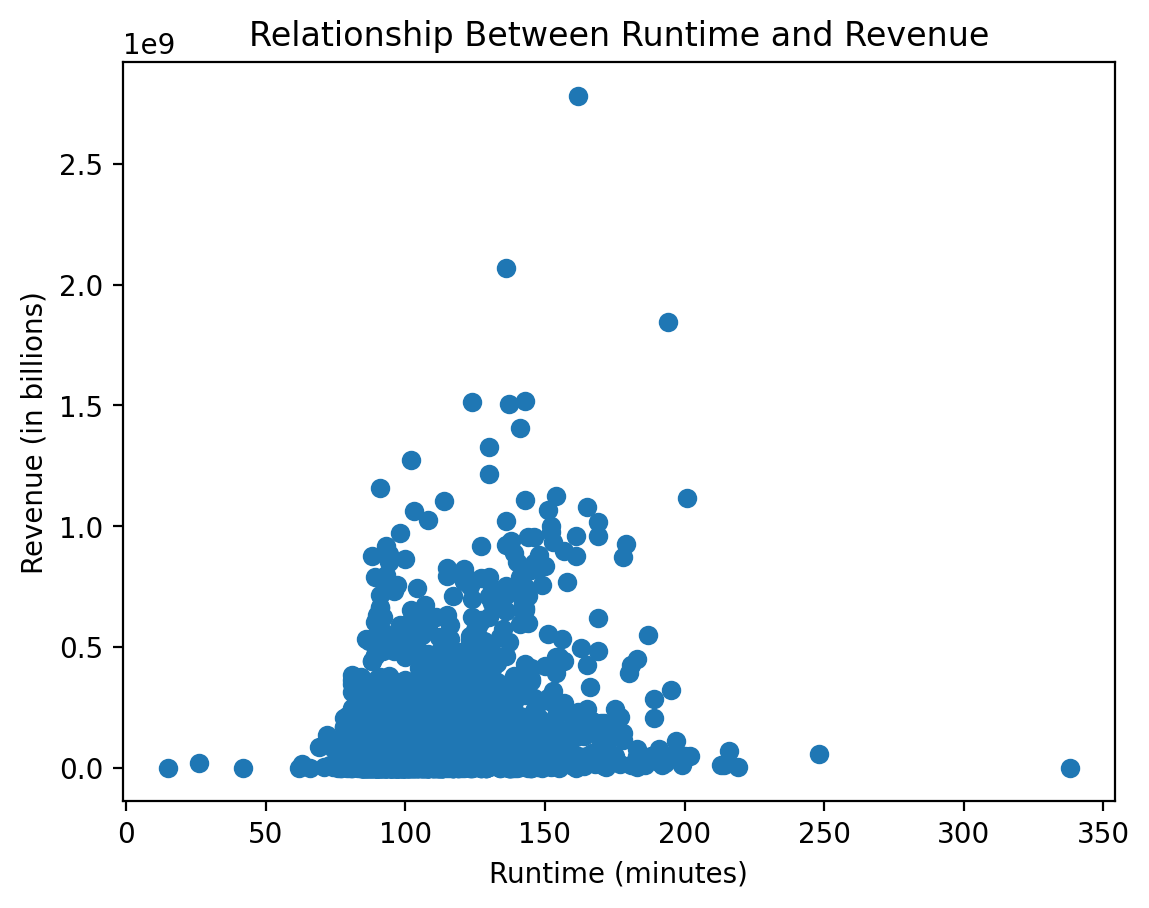

In [31]:
# Scatter plot to visualize the relationship
plt.scatter(df['runtime'], df['revenue'])
plt.title('Relationship Between Runtime and Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue (in billions)')
plt.show()

In [32]:

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(df['runtime'], df['revenue'])[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.2502983488743395


In [27]:
import seaborn as sns

Movie with the Longest Runtime:
budget                                                     18000000
revenue                                                      871279
profit                                                    -17128721
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                            Olivier Assayas
tagline                              The man who hijacked the world
runtime                                                       338.0
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
Name: 2107, dtype: object

Movie with the Shortest Runtime:
budget                                                           10
revenue                                                           5
profit                  

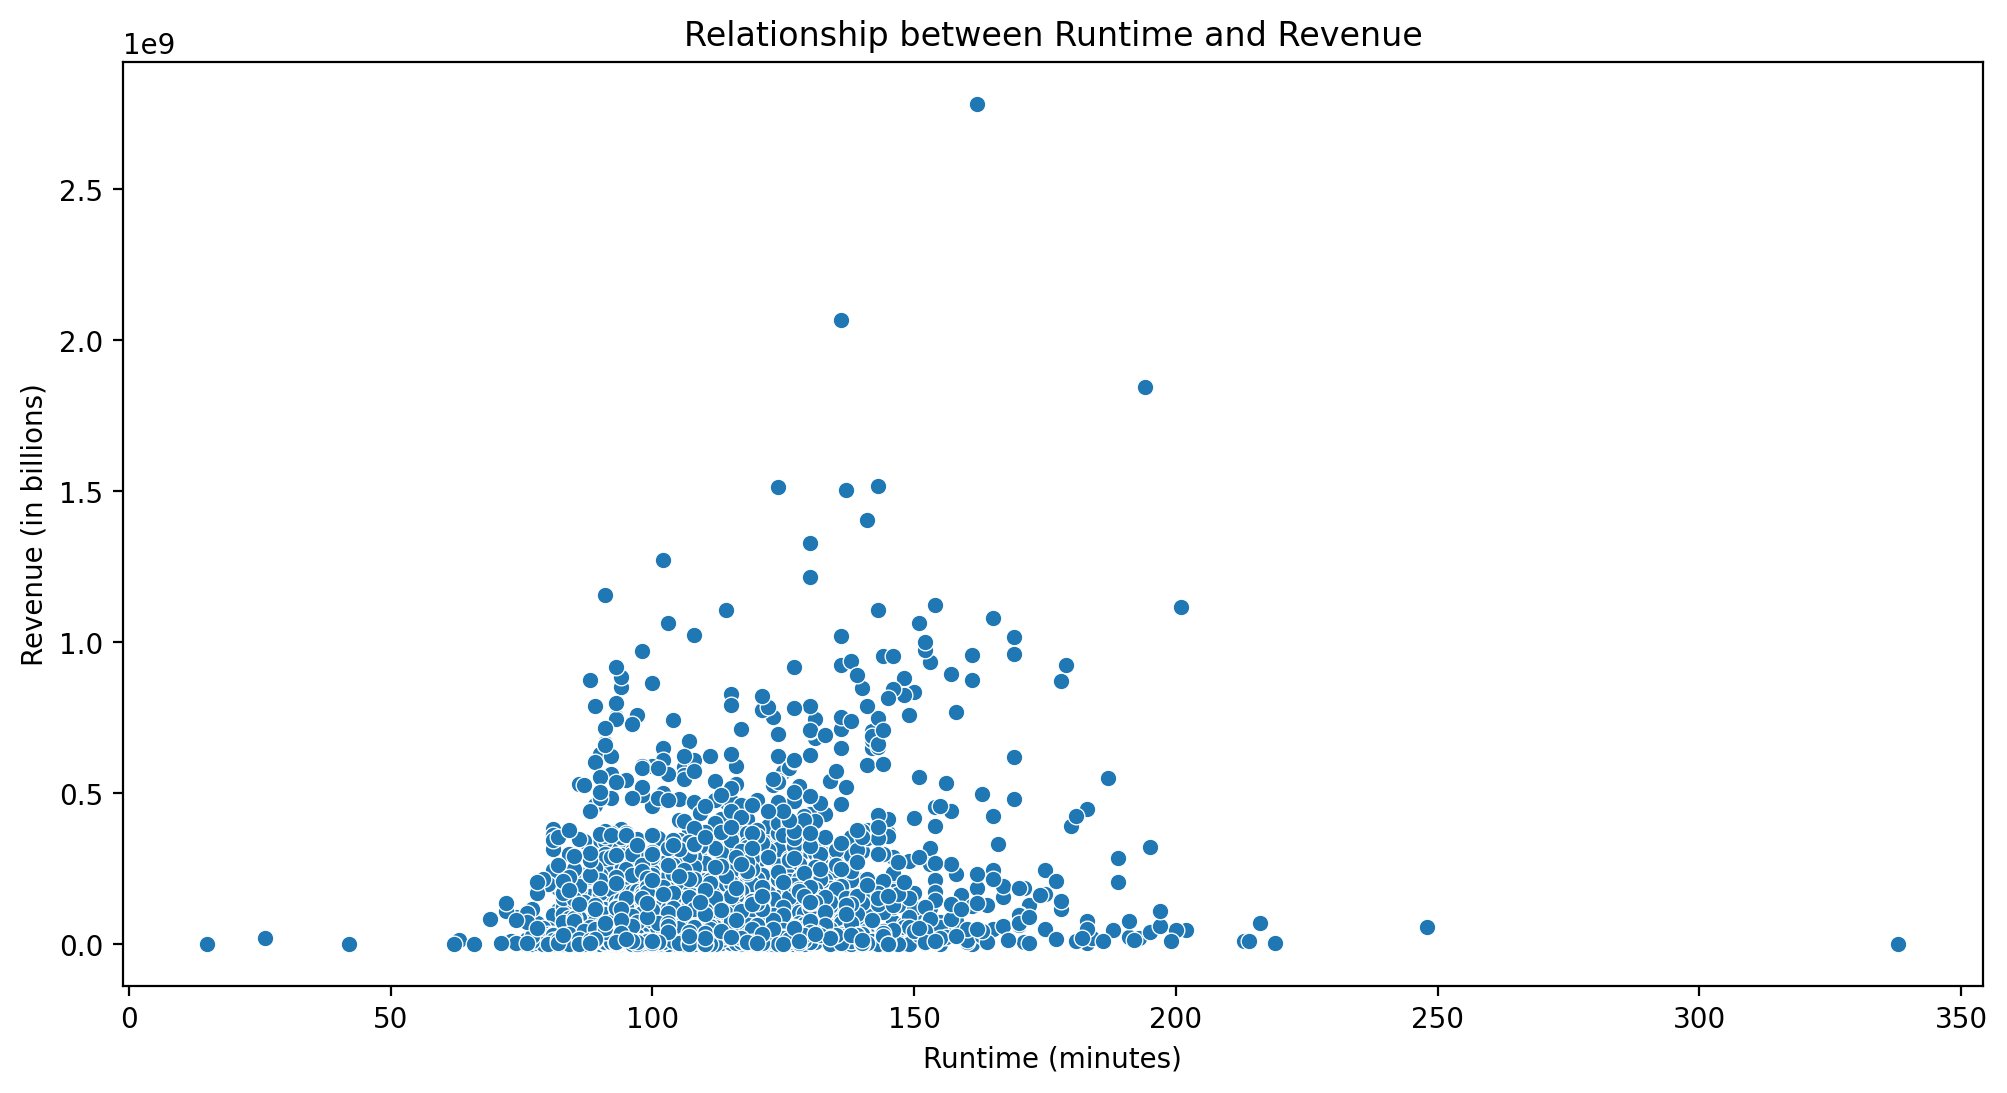

In [33]:
# Find movies with the longest and shortest runtime
runtime_info = calculate('runtime')

# Display movies with the longest and shortest runtime
print("Movie with the Longest Runtime:")
print(runtime_info.iloc[:, 0])  # Displaying the first column (longest runtime)

print("\nMovie with the Shortest Runtime:")
print(runtime_info.iloc[:, 1])  # Displaying the second column (shortest runtime)

# Explore the relationship between runtime and revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime', y='revenue', data=df)
plt.title('Relationship between Runtime and Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue (in billions)')
plt.show()


### Research Question 5 - What kinds of properties are associated with movies that have high revenues? 

(Avg budget,Avg revenue, Average duration, Most frequent cast)

We will now find characteristics of profitable movies, Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.

#### So lets fix this amount by selecting the movies having profit of $50M or more :

In [34]:
#selecting the movies having profit of $50M or more
profit_data = df[df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#print the changed dataset
profit_data.head(3)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [35]:
#counting the no.of rows in the new data base
len(profit_data)

1338

So our dataset is reduced to 1338 rows from 3853 (in earlier case).

#### A. Successful Genres

In [36]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [37]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

#### Here's a graphical analysis of the above collected data

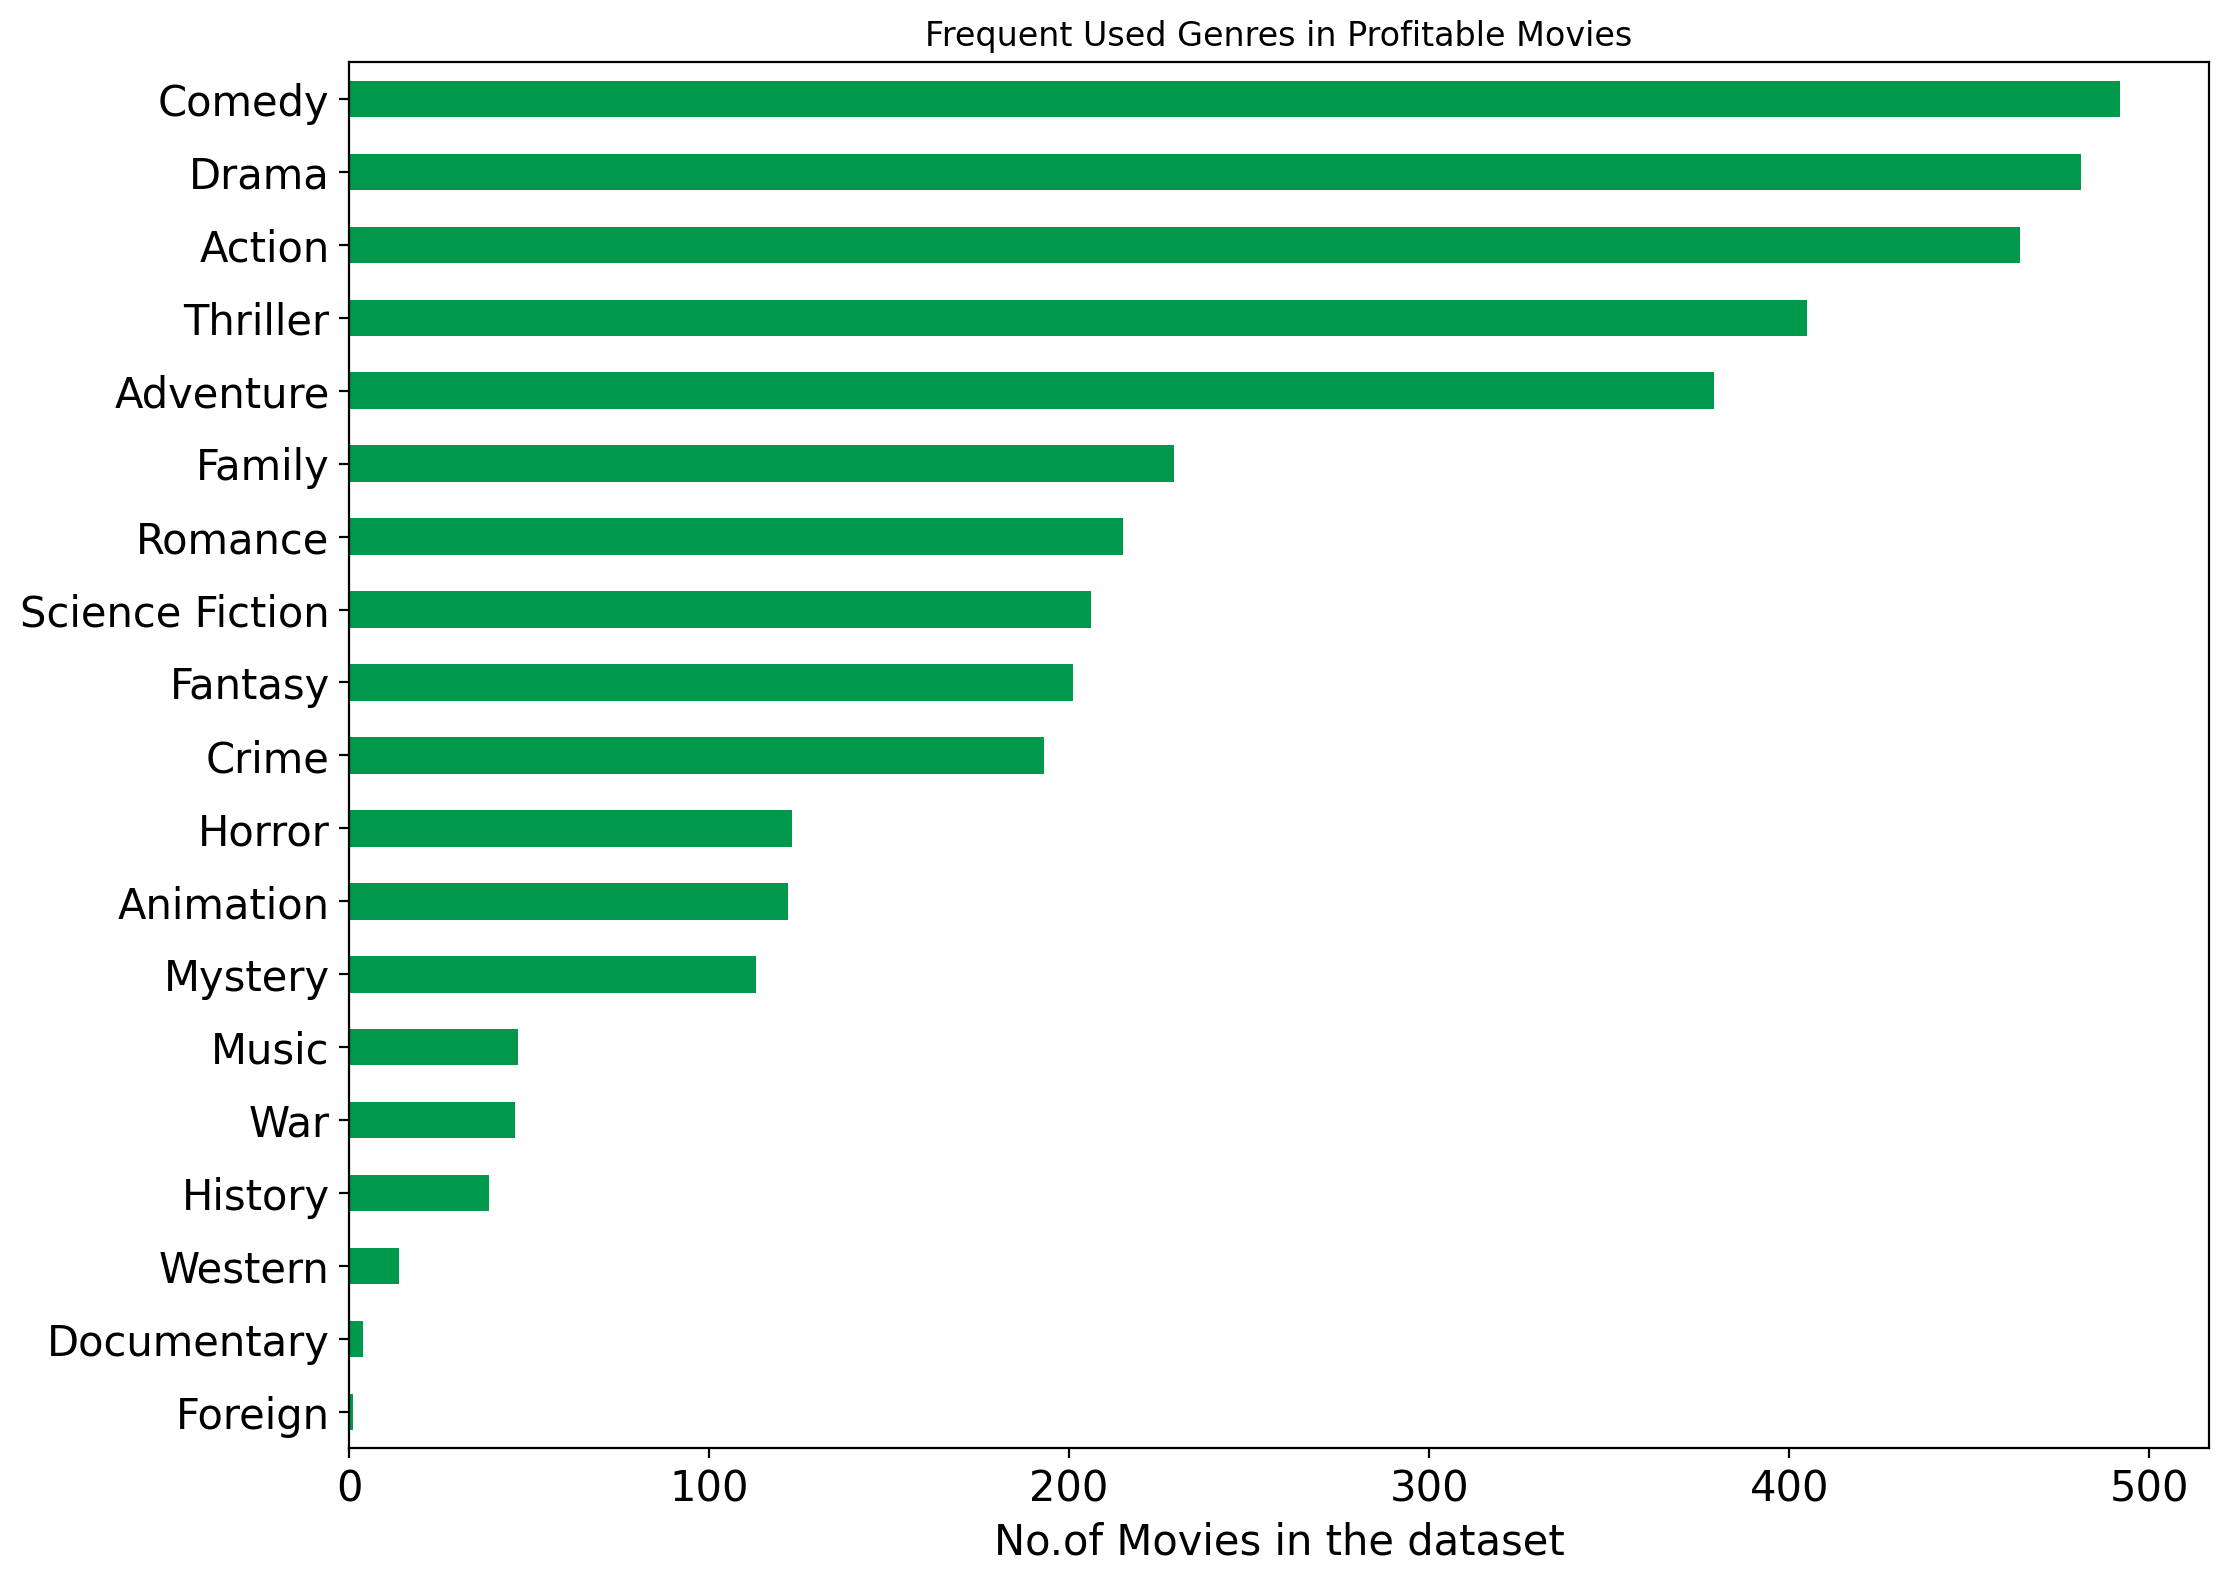

In [38]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
pt = count.plot.barh(color = '#00994C', fontsize = 15)

#title
pt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
pt.set_xlabel('No.of Movies in the dataset', color = 'black', fontsize = '15')

#figure size(width, height)
pt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

The visualization above shows Frequent Used Genres in Profitable Movies from number of all movies.

#### B. Average Budget of the movies

In [39]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [40]:
# calling the above function for budget
profit_avg('budget')

60444957.76083707

So the movies having profit of 50 million dollar and more have an average budget of 60 million dollar.

#### C. Average Revenue earned by the movies

In [41]:
# calling the above function for revenue
profit_avg('revenue')

254957662.59491777

So the movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.

#### D. Average duration of the movies

In [42]:
# calling the above function for runtime
profit_avg('runtime')

113.66741405082212

So the movies having profit of 50 million dollar and more have an average duration of 113 minutes.

#### E. Most Frequent Cast

We will call the previous function data(column) again for this analysis.

In [43]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

Tom Cruise is on the top for appearing the most in movies profiting more than $50M with total of 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.

/tmp/ipykernel_14/1791472443.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


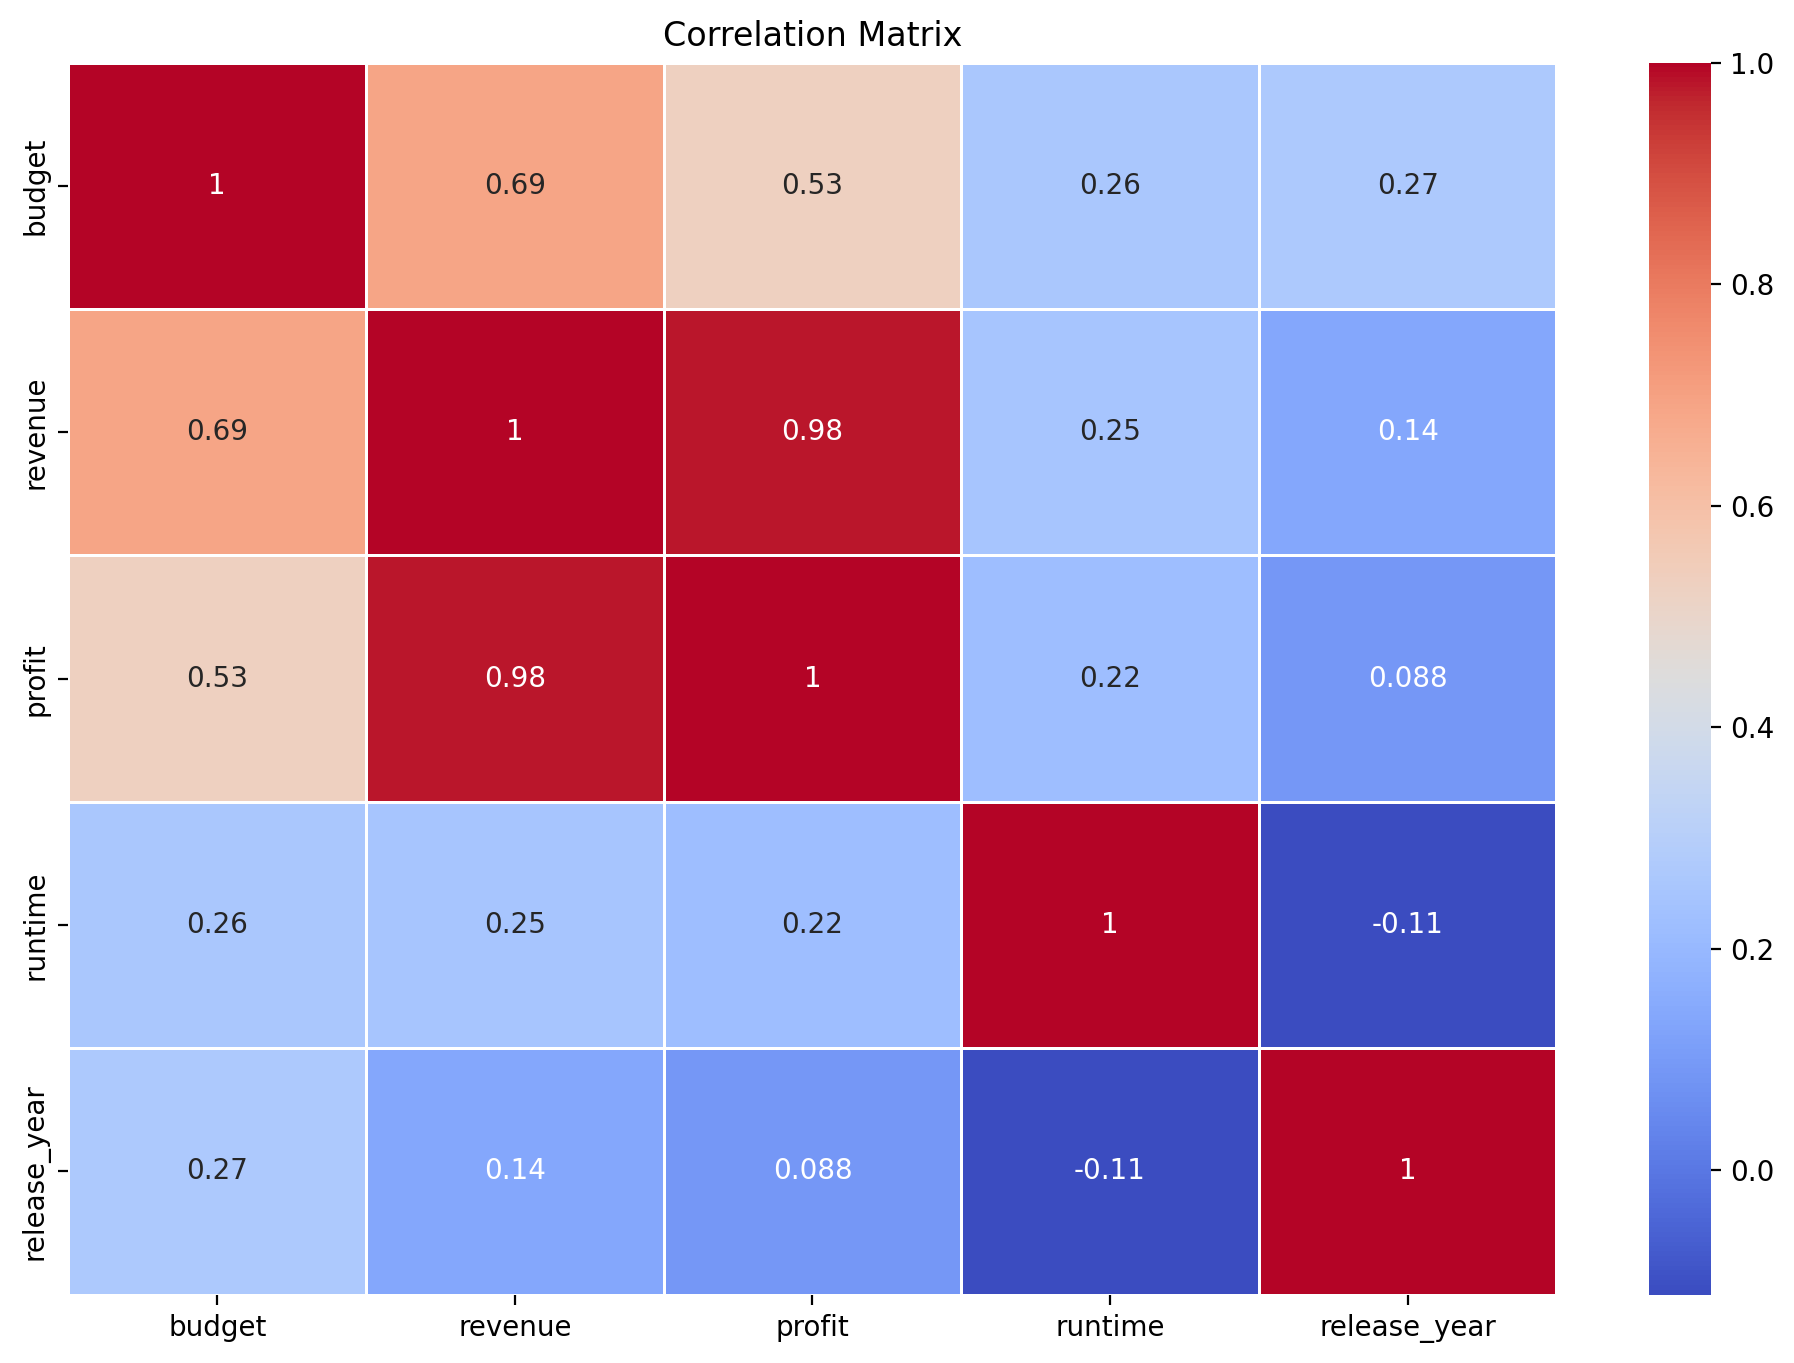

In [44]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display a heatmap to visualize the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Research Question 6 - What is the average runtime of the movies?

In [46]:
# define a function to find average of a column
def avg_fun(column):
    return df[column].mean()

In [47]:
# Calculate the average runtime
average_runtime = df['runtime'].mean()

# Display the result
print(f"The average runtime of the movies is: {average_runtime:.2f} minutes")


The average runtime of the movies is: 109.22 minutes


In [48]:
#Invoking avg_fun function
avg_fun('runtime')

109.22029060716139

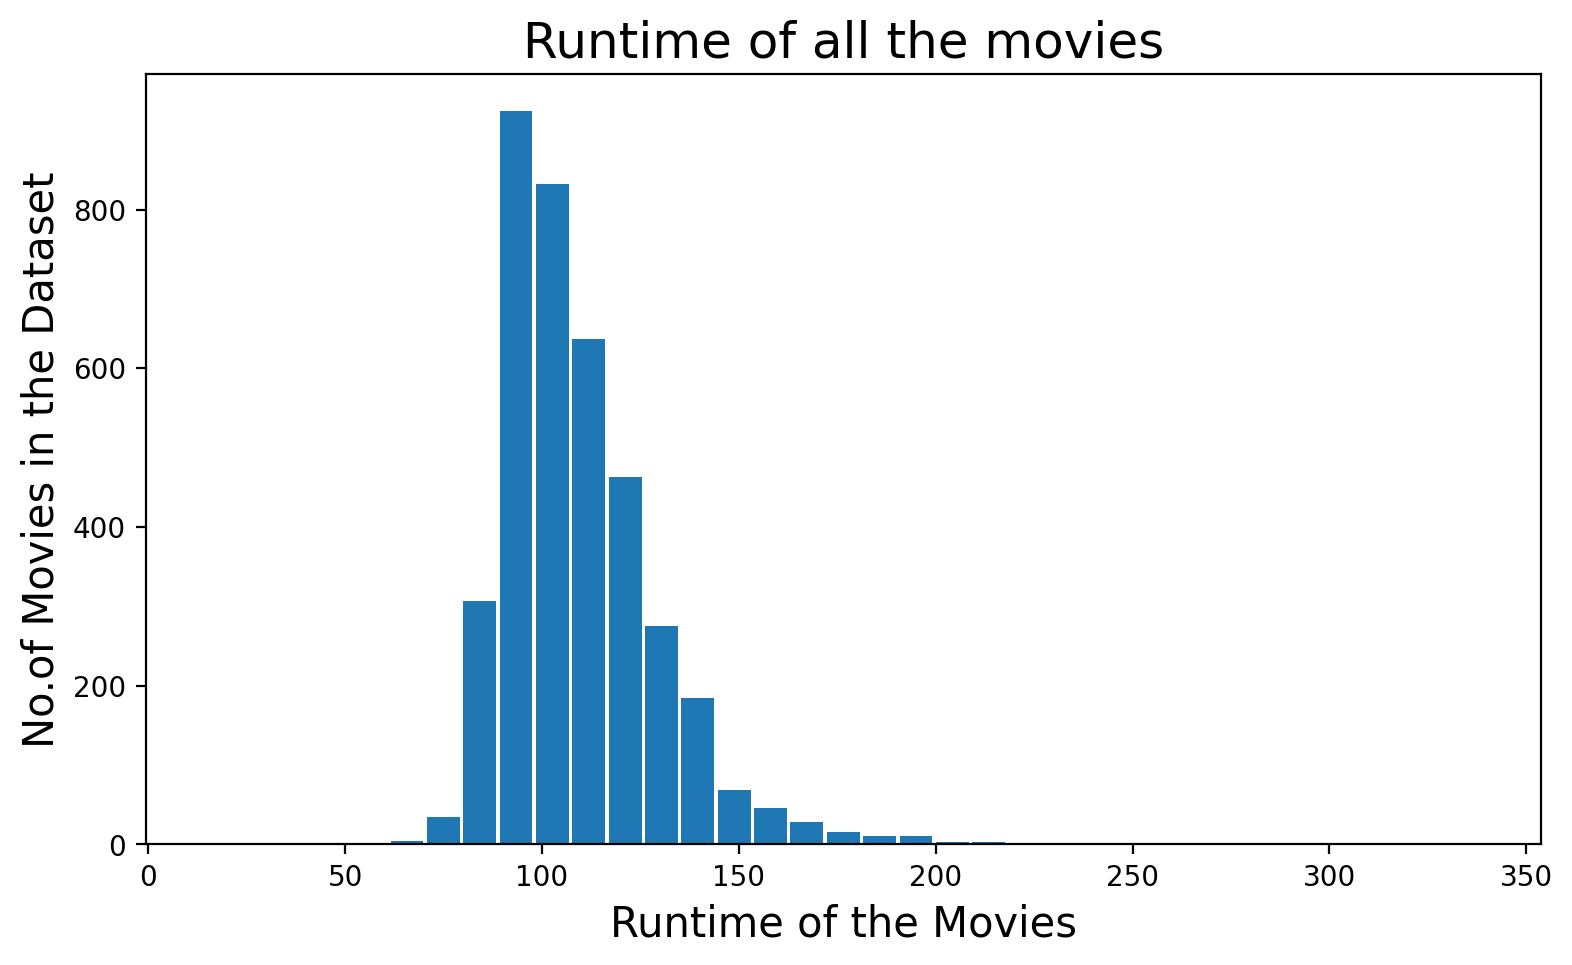

In [40]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The distribution of the above graph is positively or right skewed! Most of the movies duarations arrange from 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.

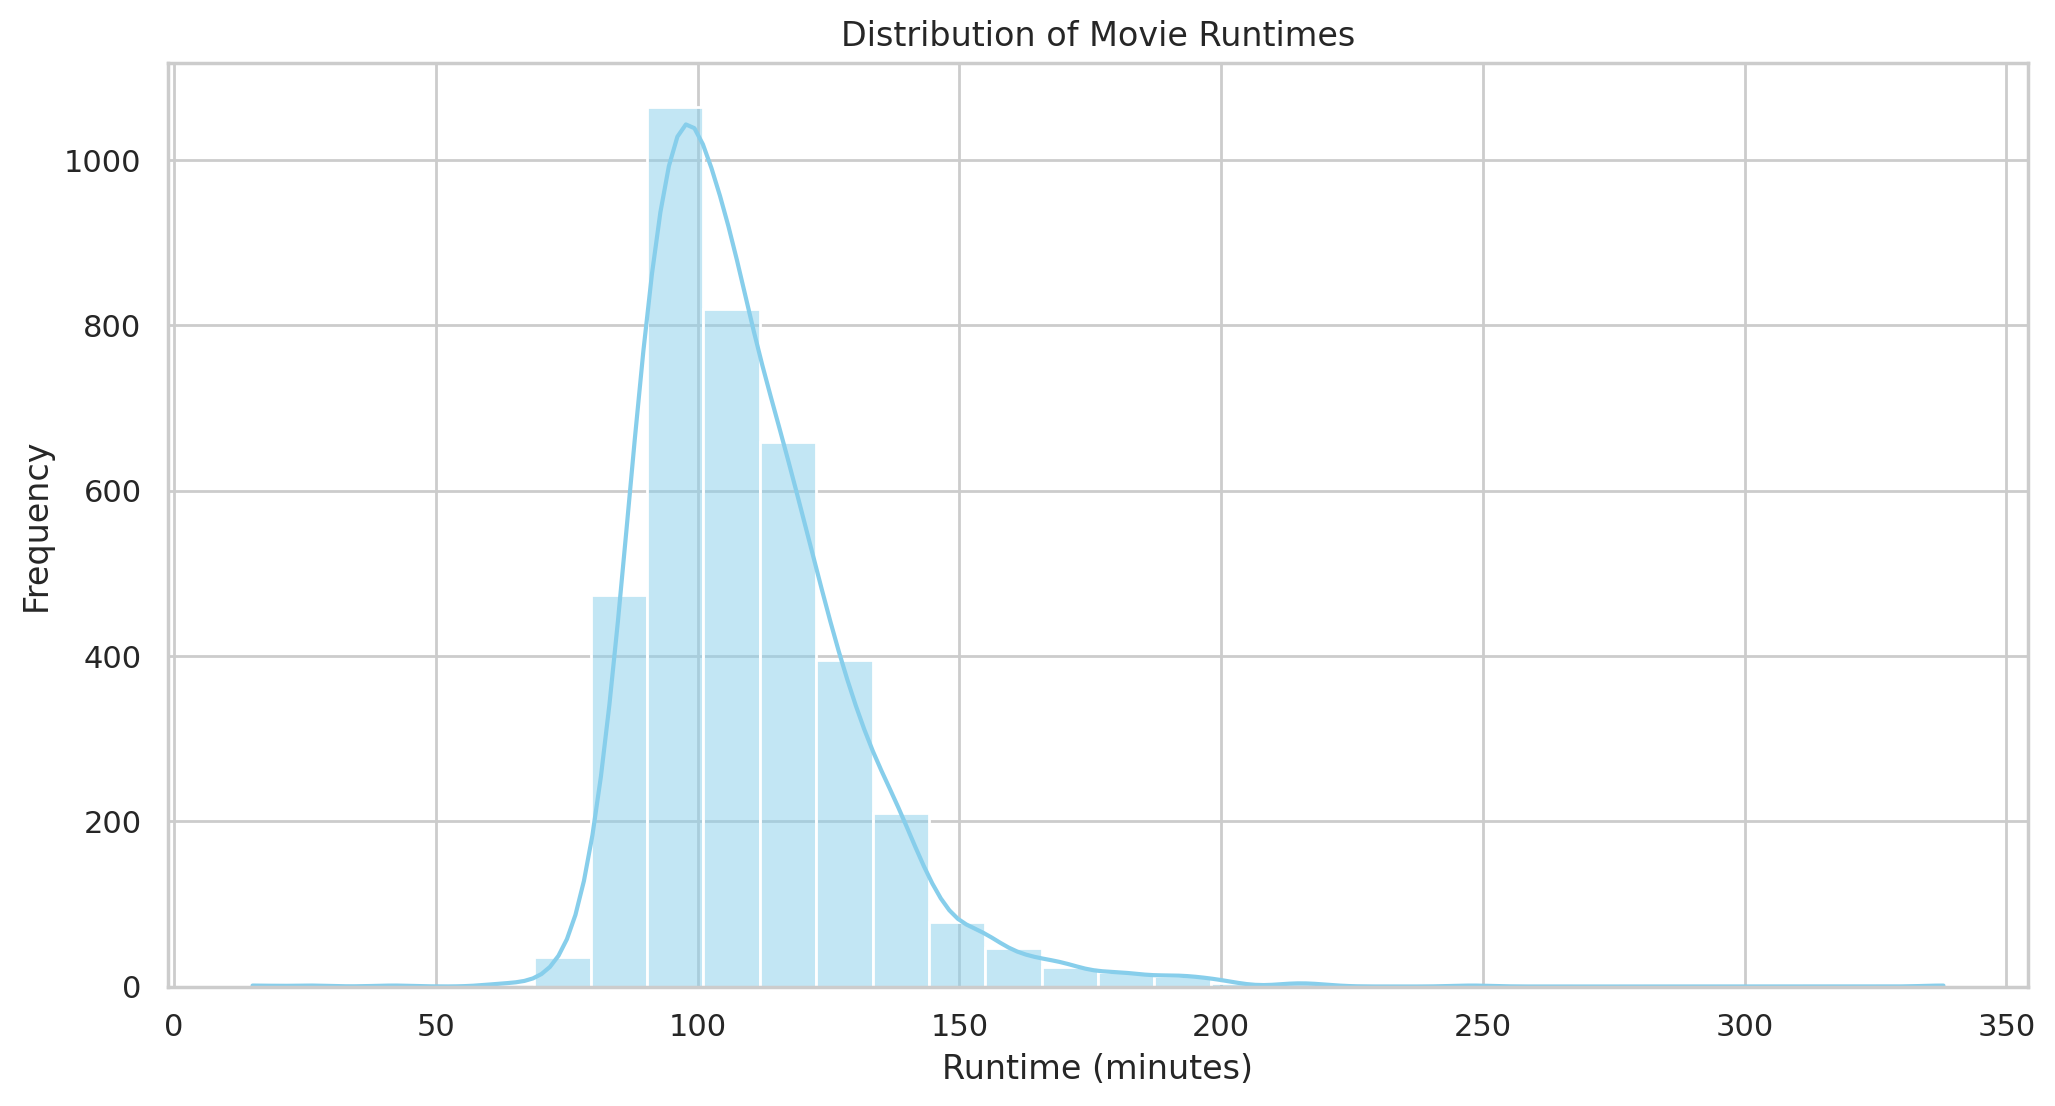

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram of runtime
plt.figure(figsize=(12, 6))
sns.histplot(df['runtime'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


#### Lets take another look at runtime of the movie using different kind of plots i.e Box Plot and Data Point Plot

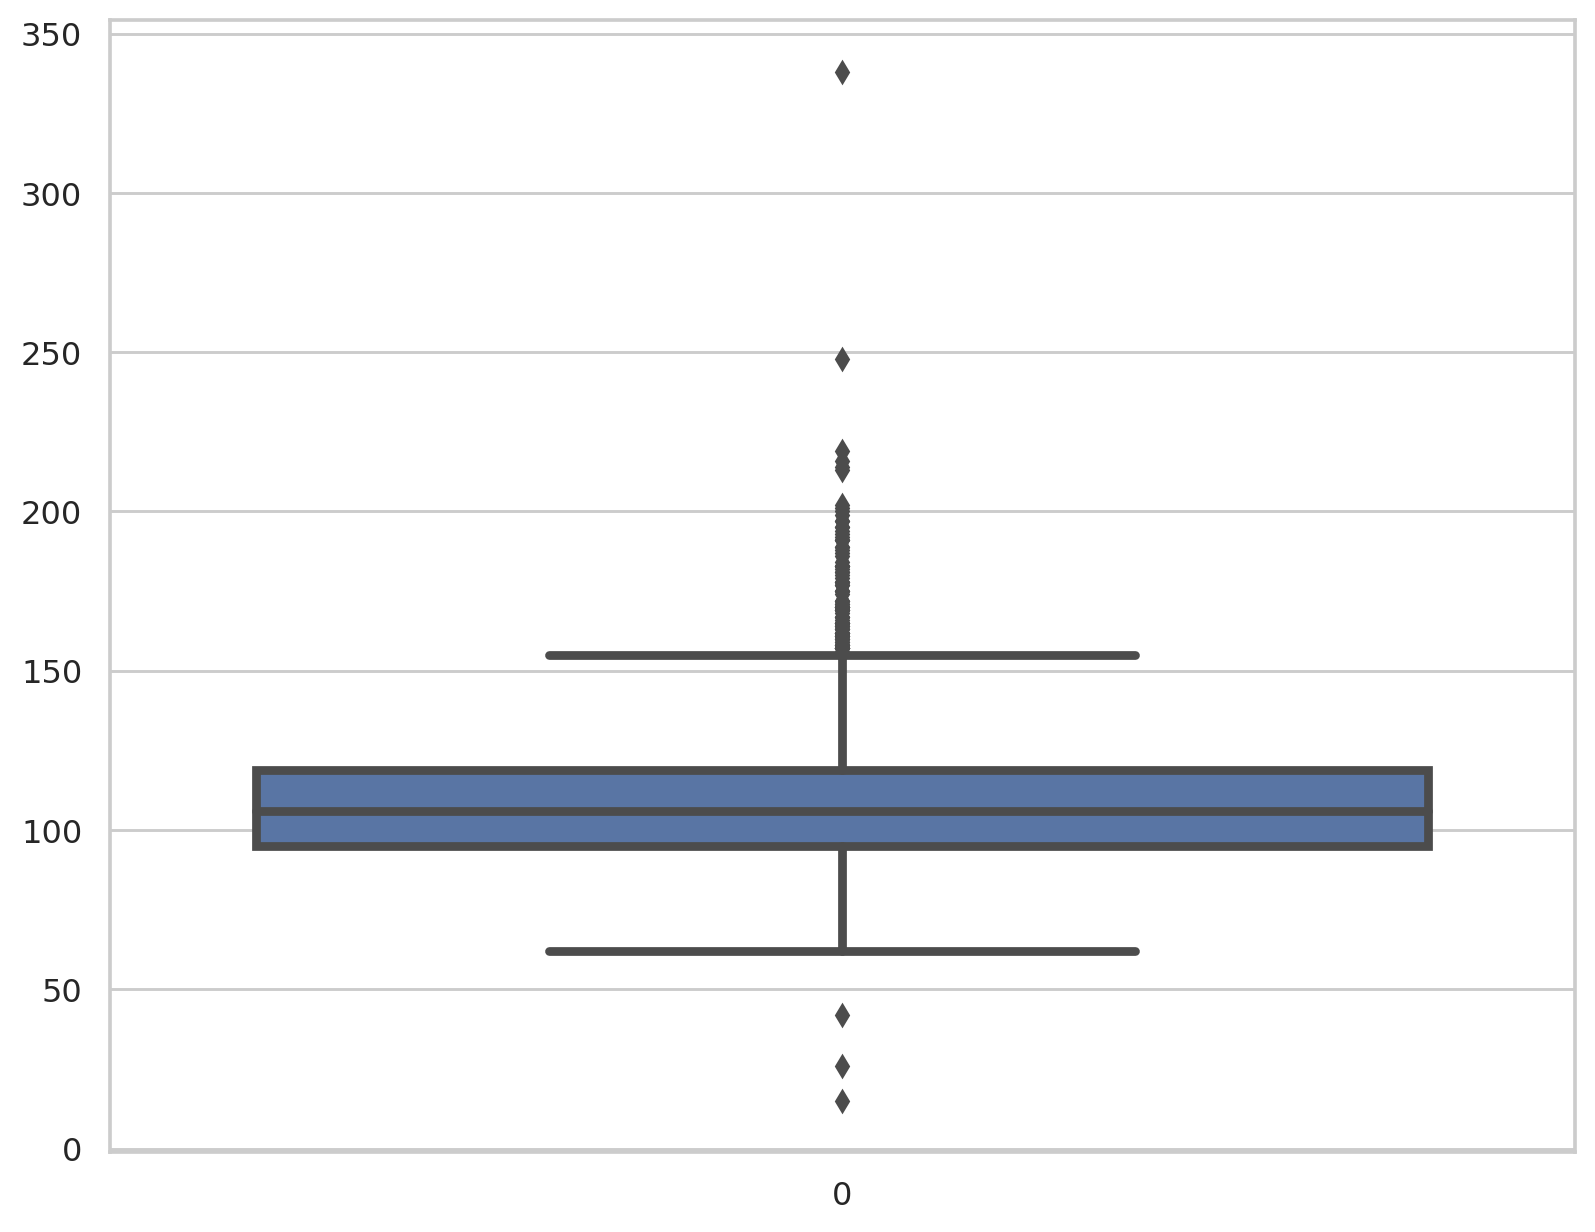

In [50]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

/opt/venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


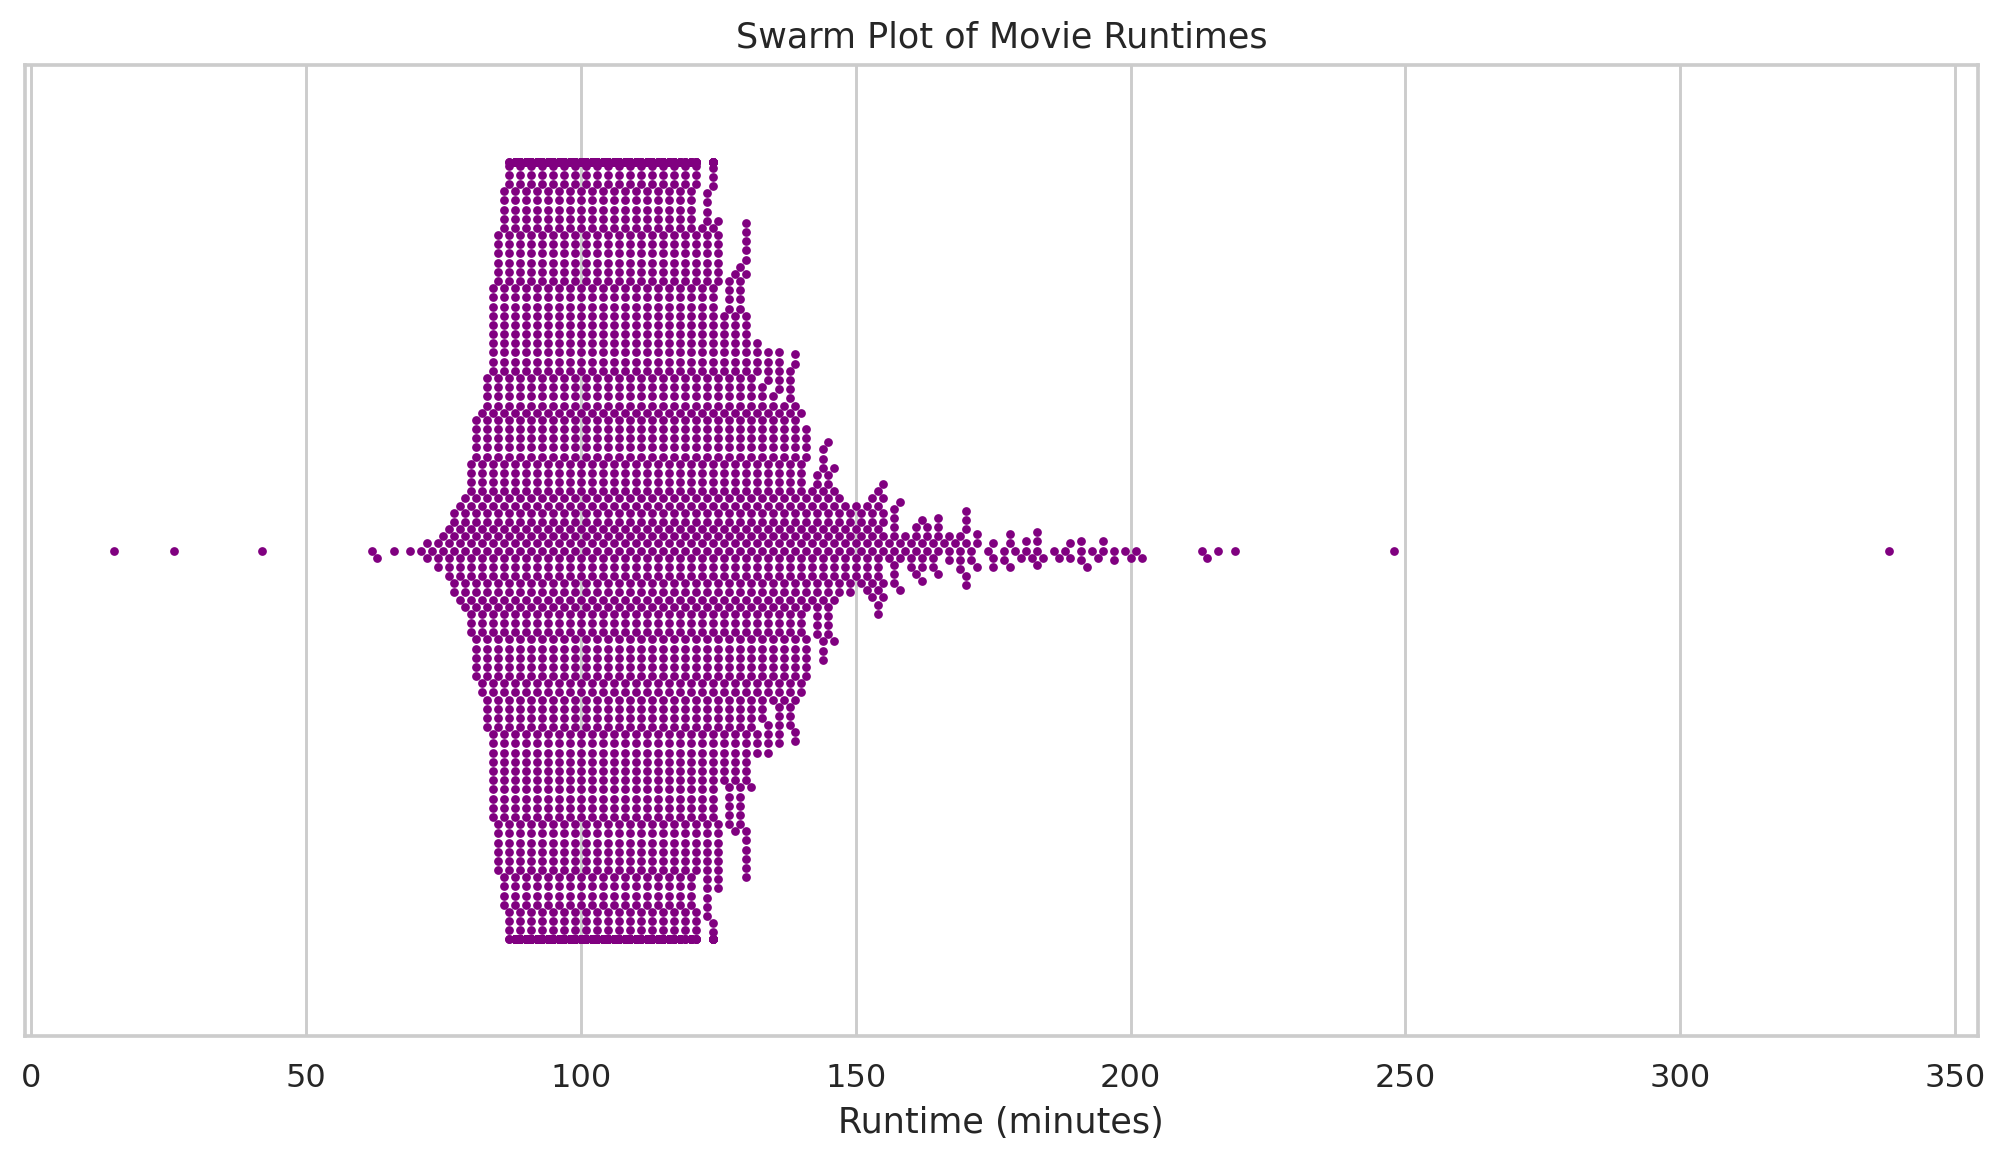

In [55]:
# Assuming df is your DataFrame with the 'runtime' column
plt.figure(figsize=(12, 6), dpi=105)

# Using seaborn swarmplot to generate the plot
sns.swarmplot(x=df['runtime'], color='purple', size=3)

# Adding labels and title
plt.xlabel('Runtime (minutes)')
plt.title('Swarm Plot of Movie Runtimes')

# Displaying the plot
plt.show()

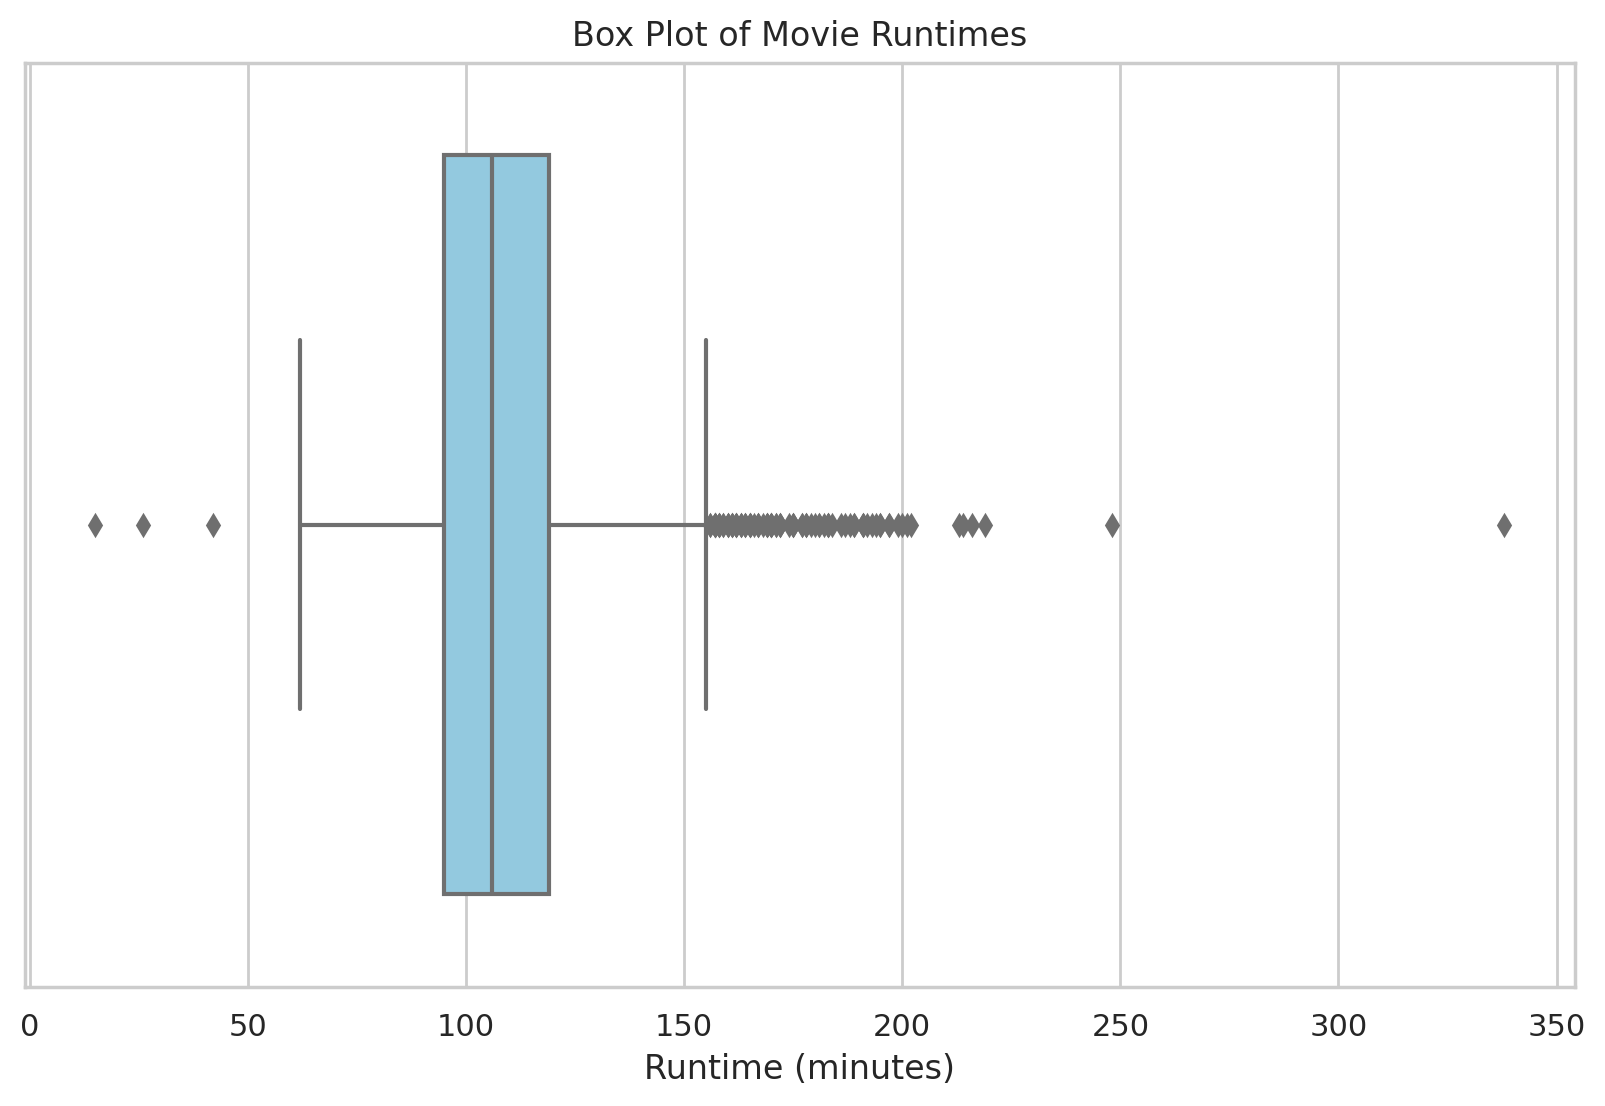

In [56]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a box plot of runtime
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['runtime'], color='skyblue')
plt.title('Box Plot of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.show()


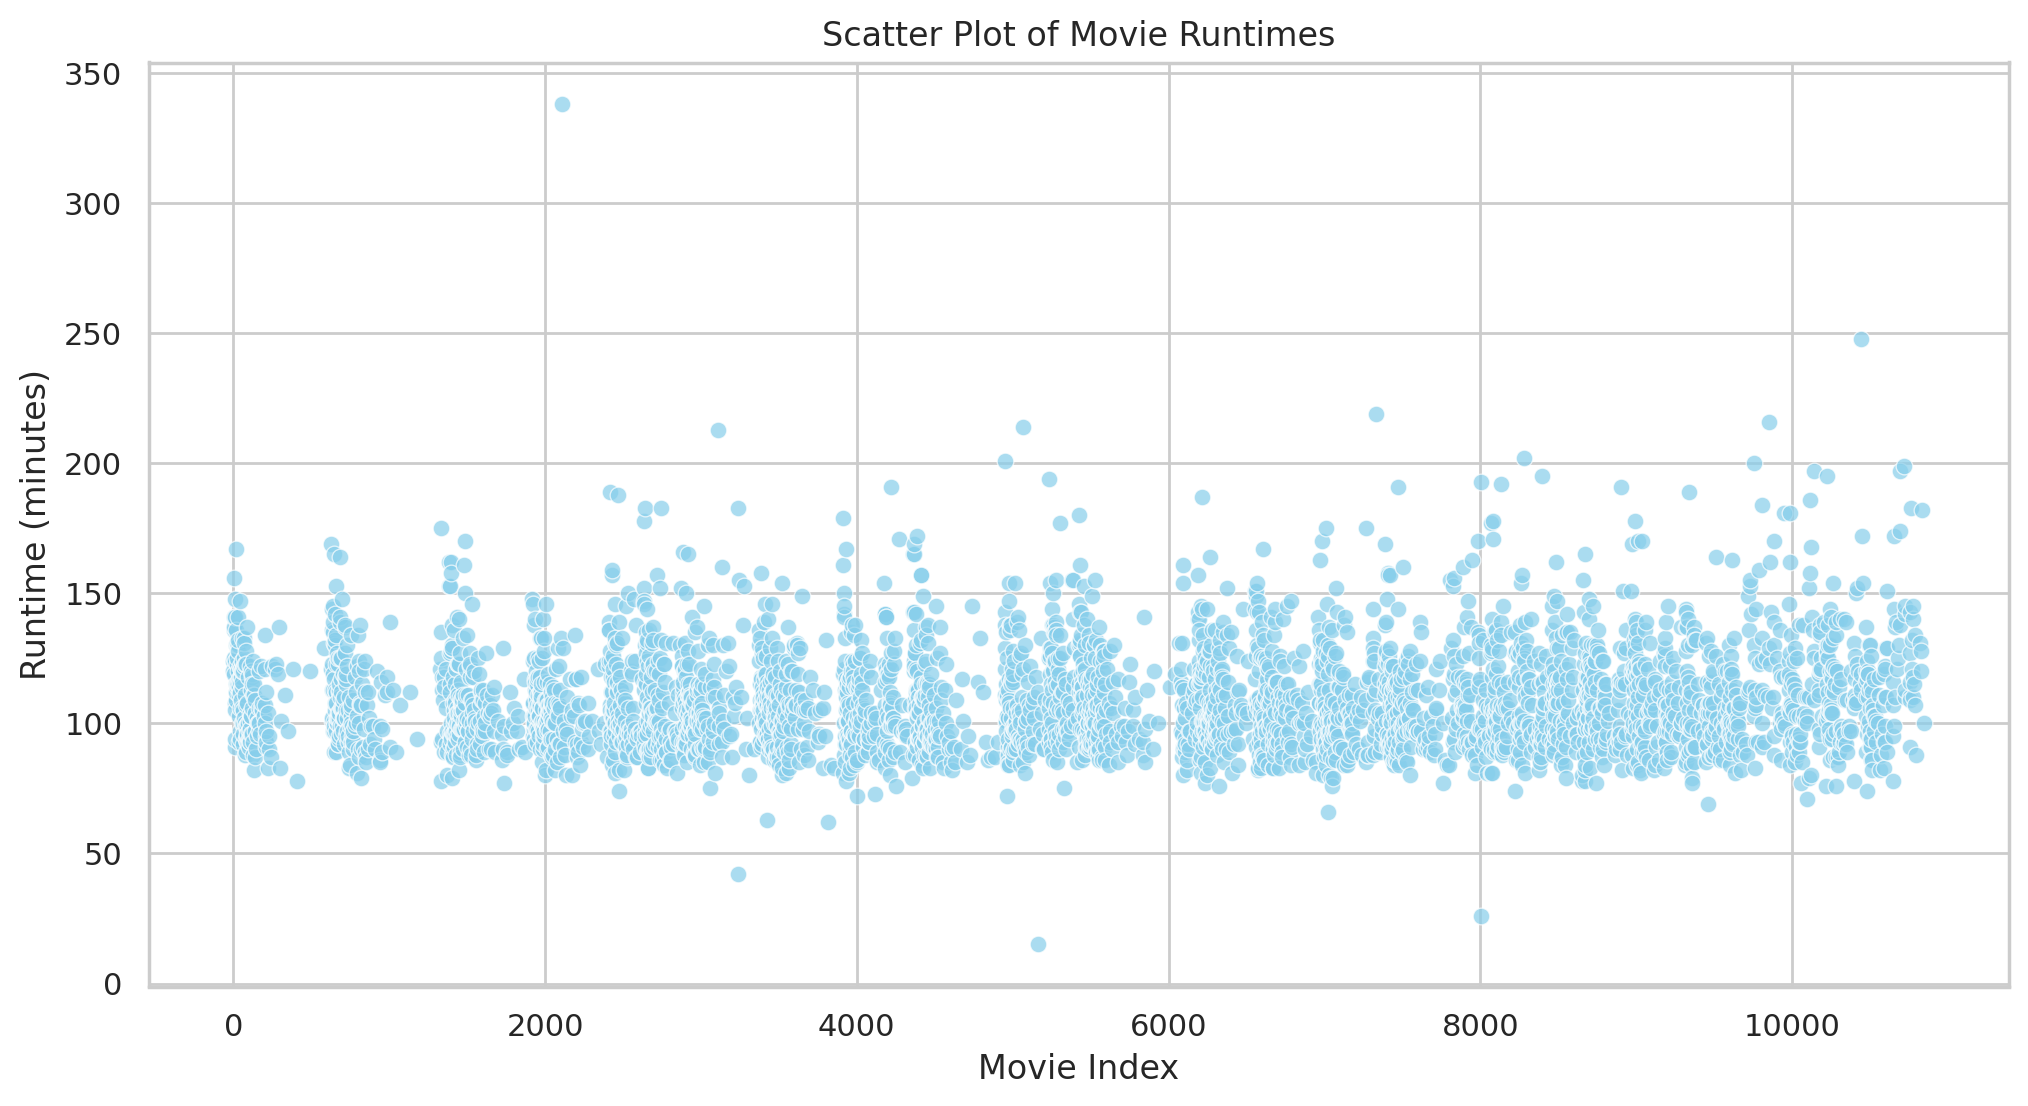

In [57]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a scatter plot of runtime
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df['runtime'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Movie Runtimes')
plt.xlabel('Movie Index')
plt.ylabel('Runtime (minutes)')
plt.show()


In [59]:
#Run statistics
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

The above first plot, the box-plot gives an overall idea of how the ditribution is in case of runtime of the movies. And also shows the outliers.

The second plot "Data Point Plot" generated above gives a visual of the distribution of runtime of movies by plotting the points againts their respective positions in the ditribution.

By looking at both of the plots and calculations, we can conclude that:

1. 25% of the movies have a runtime of less than 95 minutes
2. 50% (median) of movies have a runtime of less than 109 minutes.
3. 75% of movies have a runtime of less than 119 minutes

### Research Question 8  - Which year had the most profitable movies?

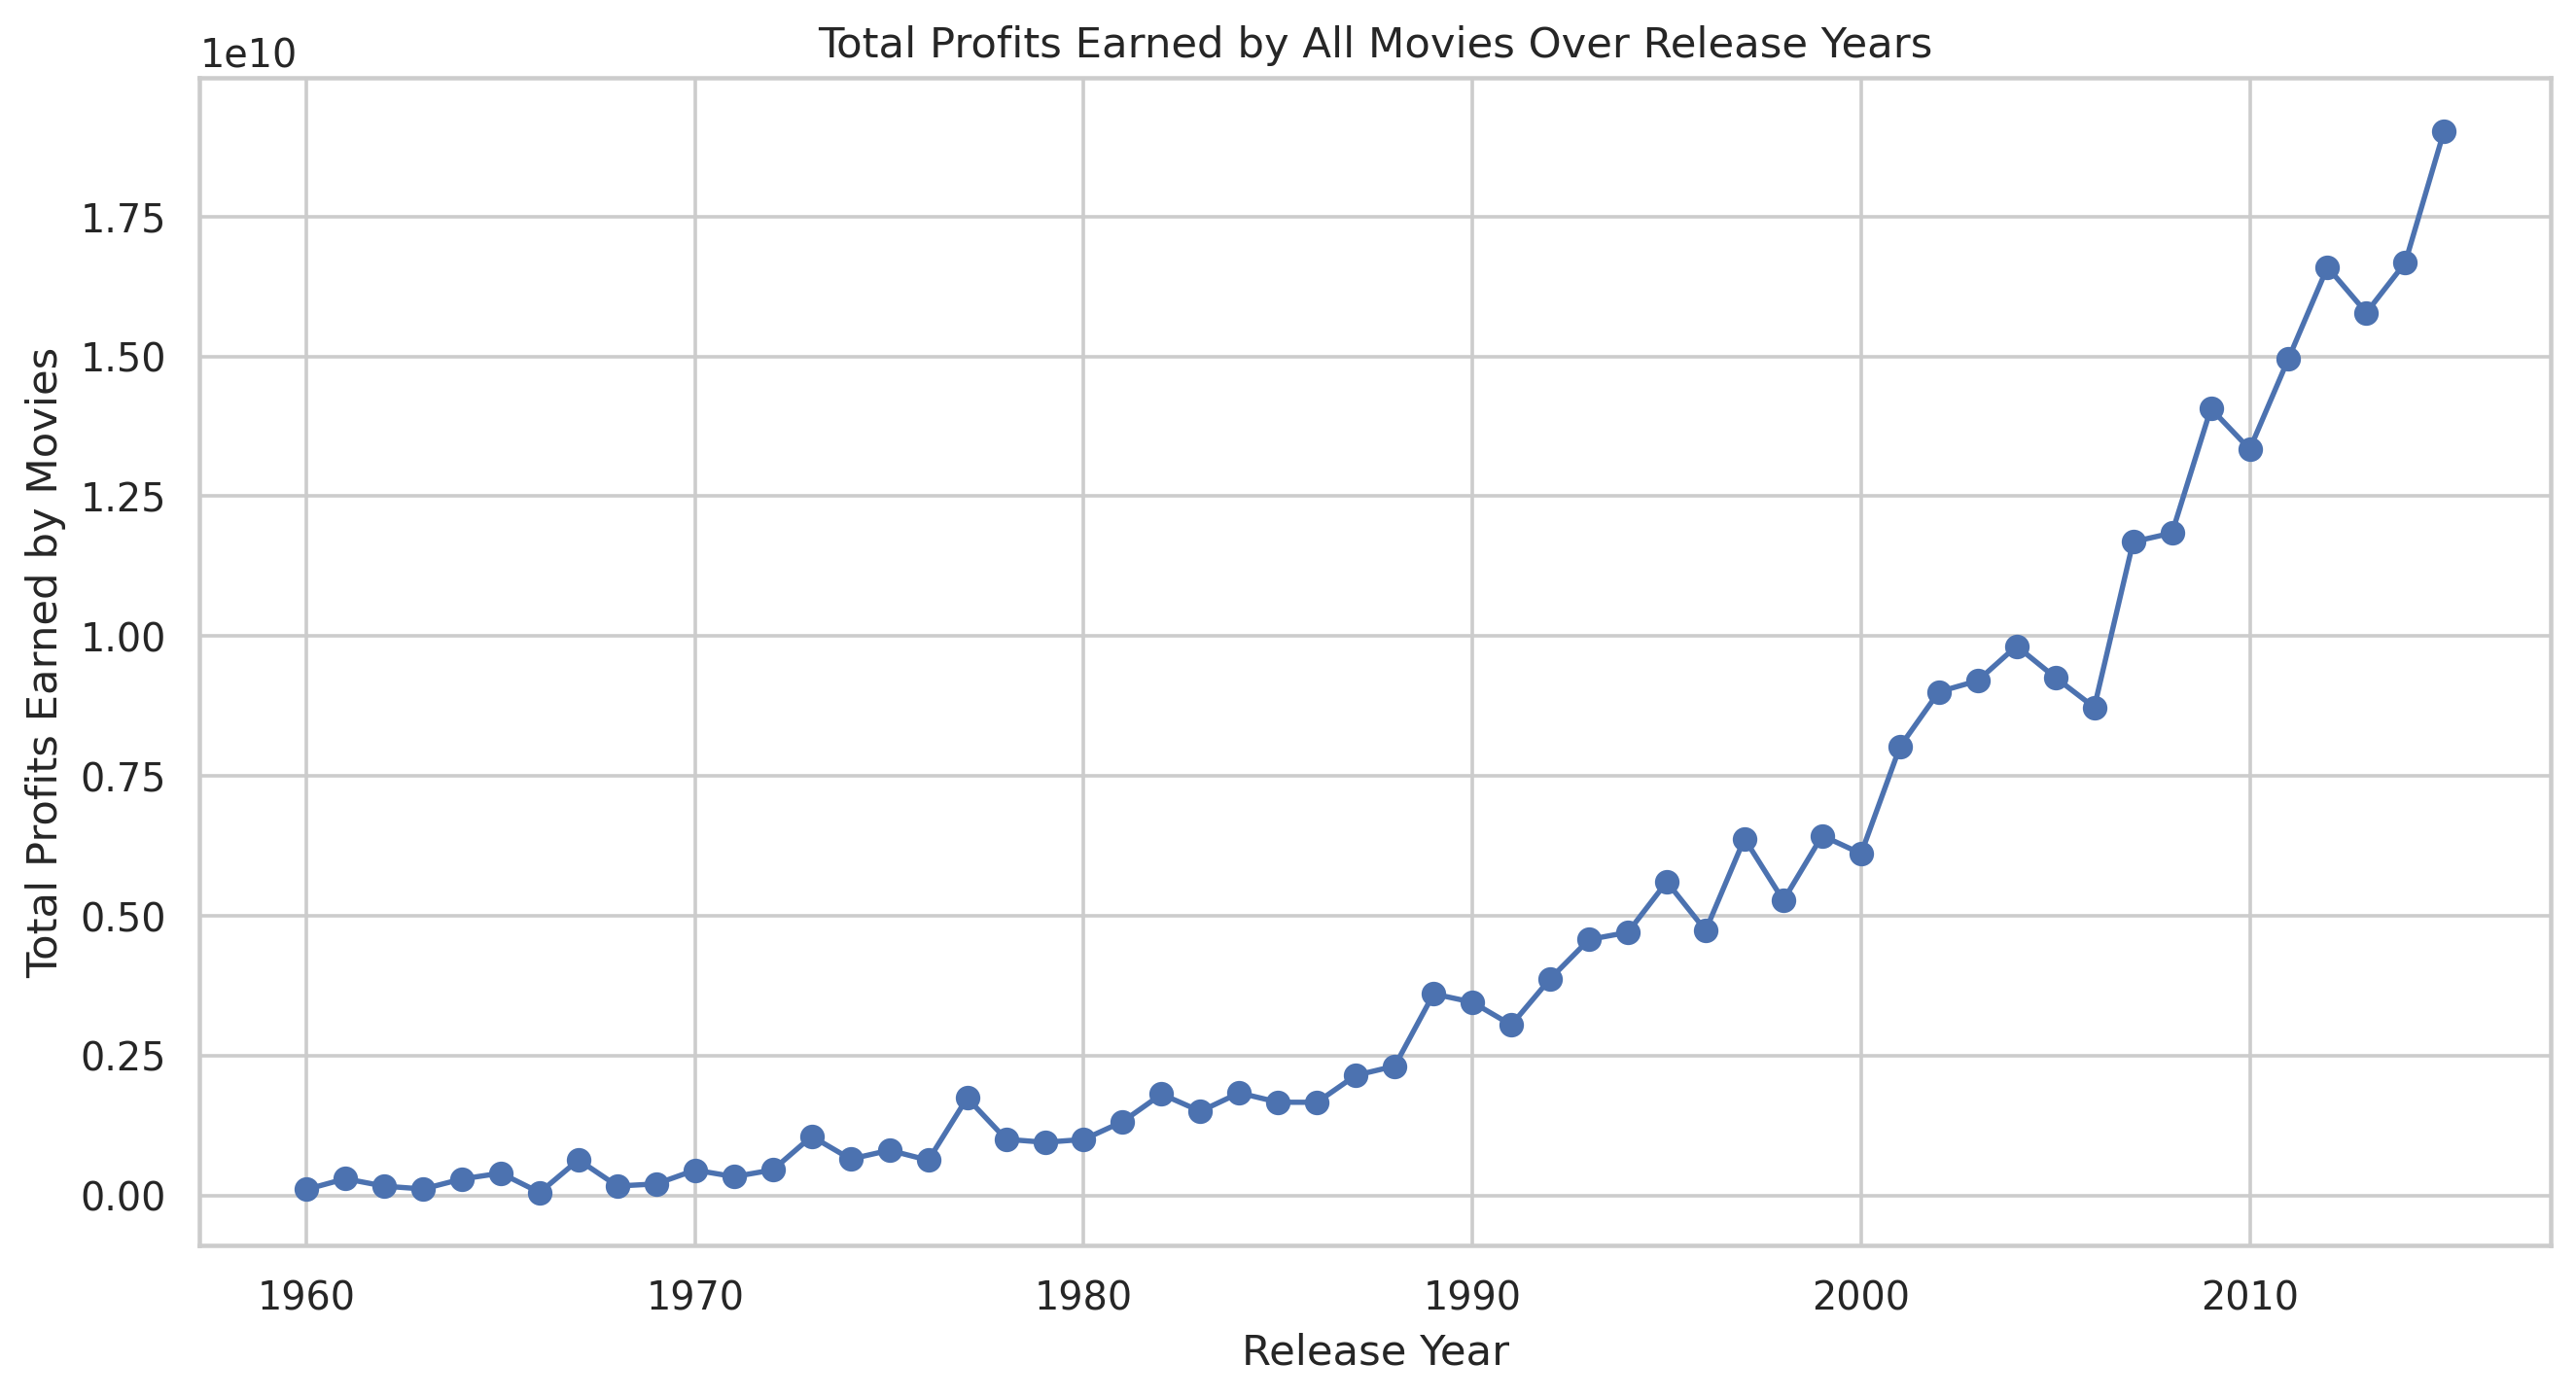

In [60]:
# Calculate total profits earned by all movies for each release year
profits_by_year = df.groupby('release_year')['profit'].sum()

# Plotting the total profits over release years
plt.figure(figsize=(12, 6), dpi=130)
plt.plot(profits_by_year.index, profits_by_year, marker='o', linestyle='-')

# Setting axis labels and title
plt.xlabel('Release Year')
plt.ylabel('Total Profits Earned by Movies')
plt.title('Total Profits Earned by All Movies Over Release Years')

# Displaying the line plot
plt.show()

In [63]:
#To find that which year made the highest profit?
profits_by_year.idxmax()

2015

In [64]:
# Grouping data by release year and calculating total profit for each year
profit_by_year = df.groupby('release_year')['profit'].sum()

# Finding the year with the most total profit
most_profitable_year = profit_by_year.idxmax()
total_profit_highest = profit_by_year.max()

# Displaying the result
print(f"The most profitable year was {most_profitable_year} with a total profit of ${total_profit_highest:,.2f}")


The most profitable year was 2015 with a total profit of $19,032,145,273.00


### Question 9 - Which genres are most popular from year to year

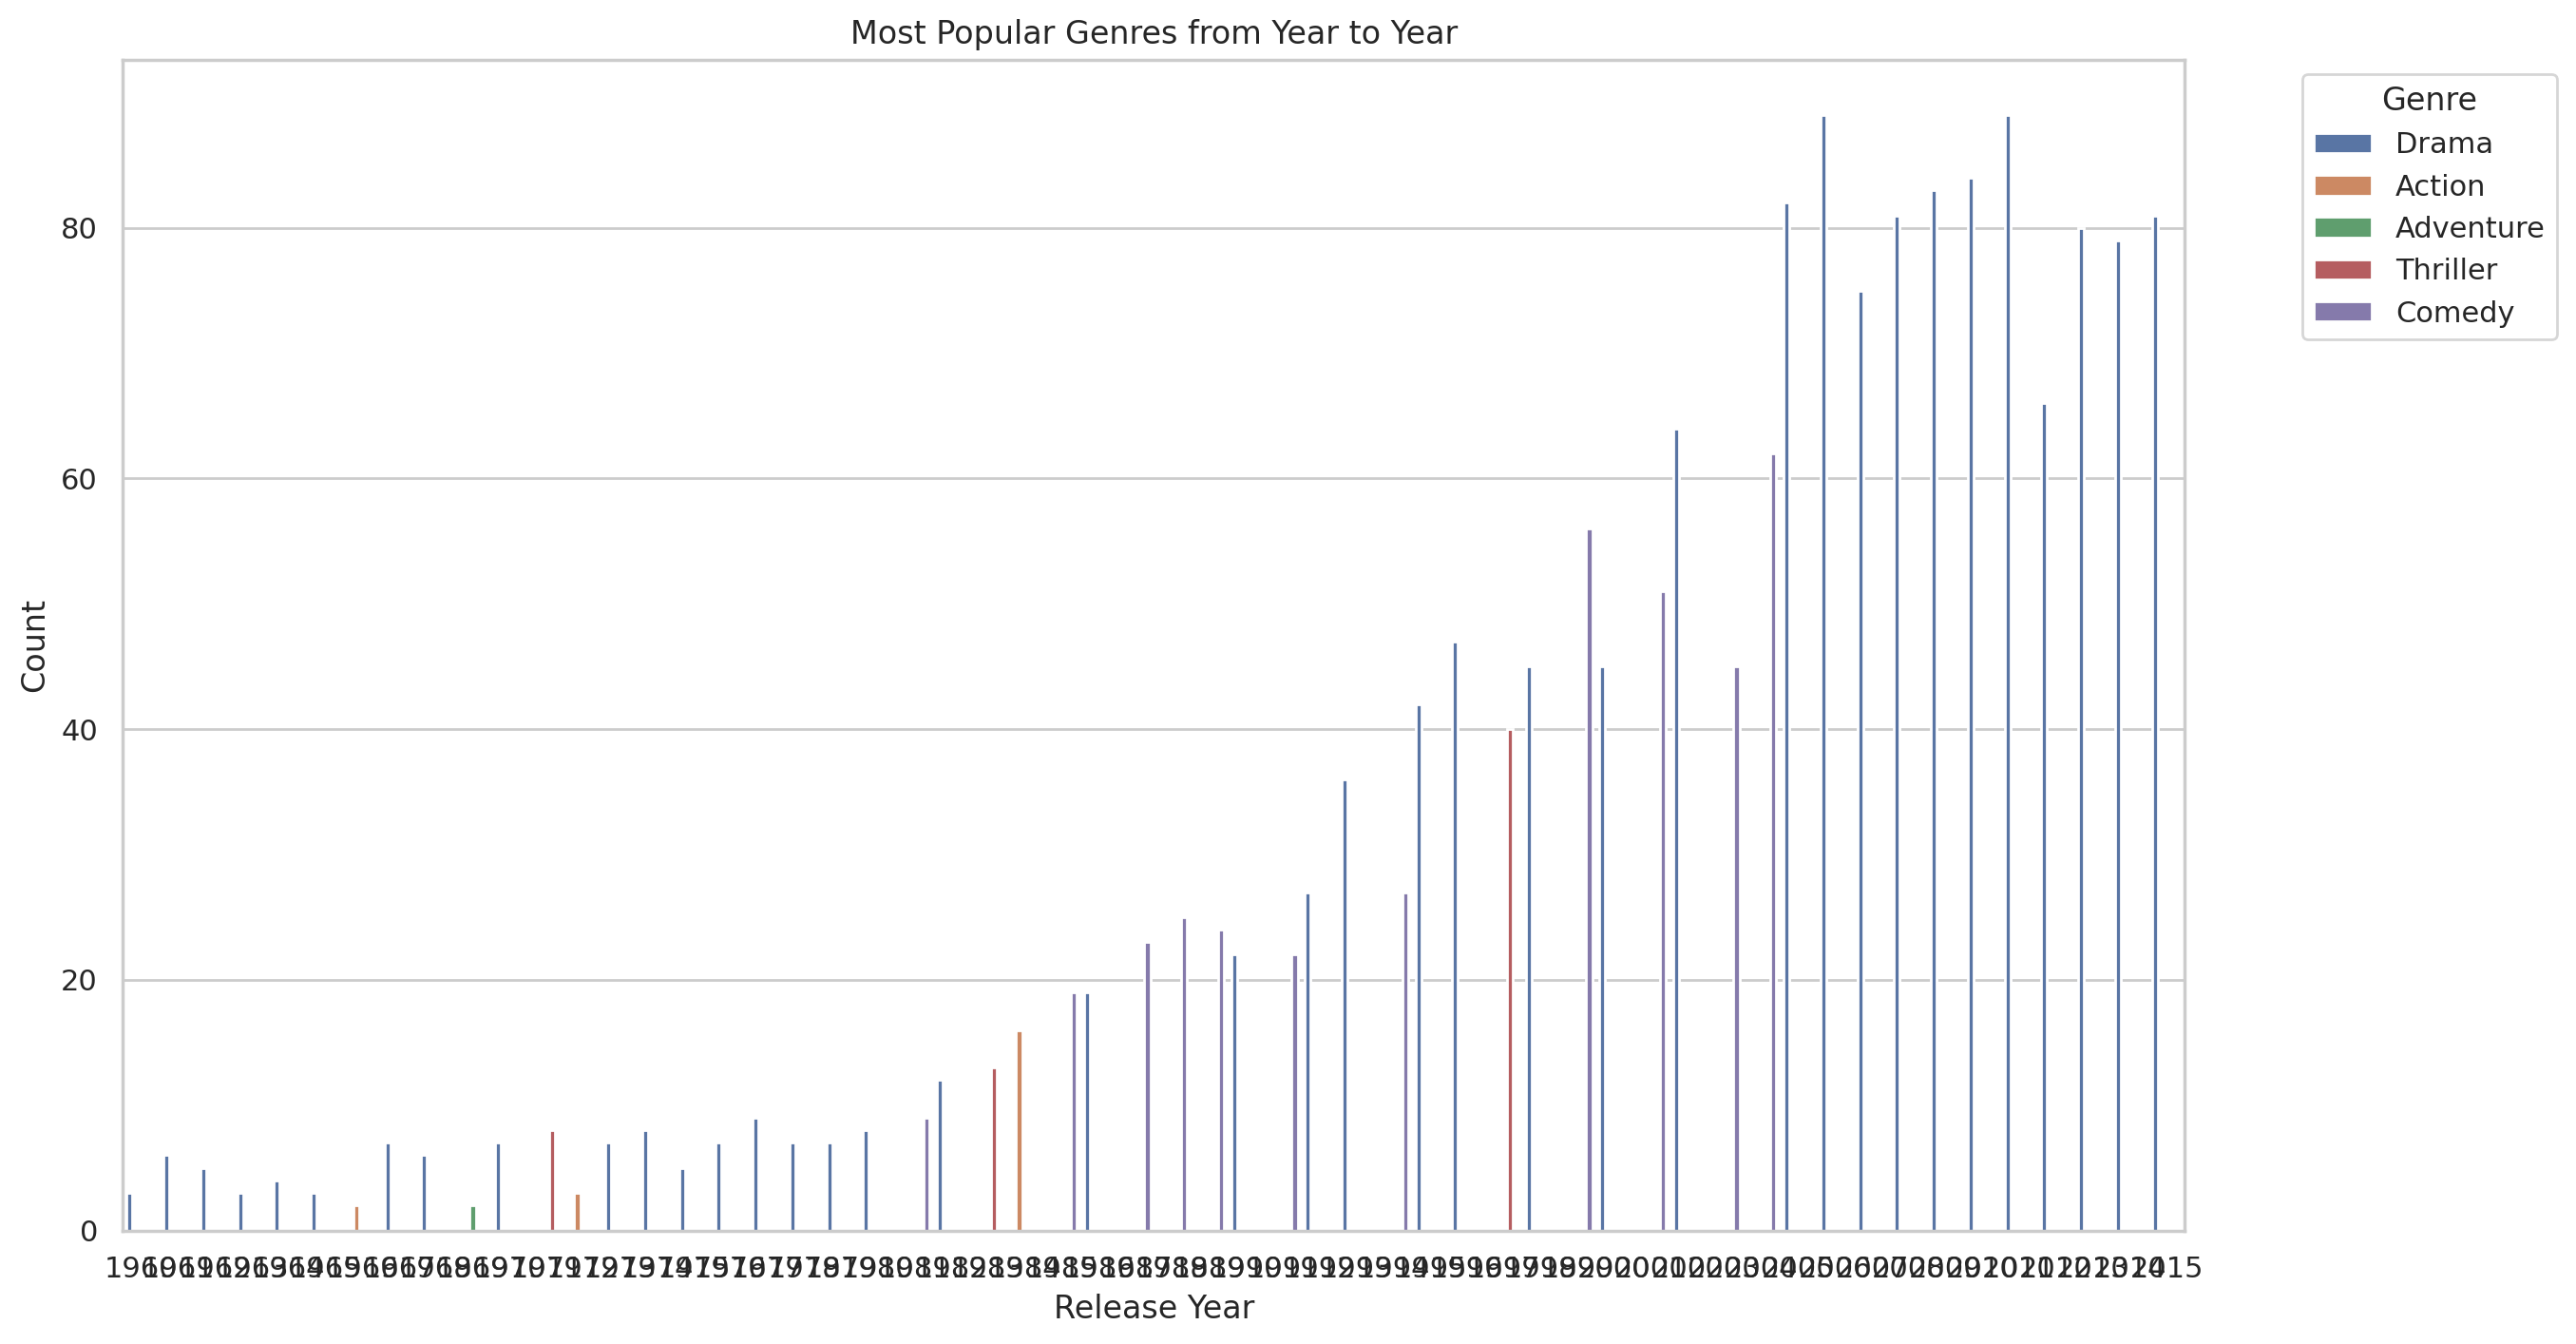

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'genres' column contains multiple genres separated by '|'
# Create a new DataFrame with one genre per row
genres_df = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Merge the new DataFrame with the original one
df_genre = df.drop('genres', axis=1).join(genres_df)

# Group by release year and genre, and calculate the count of each genre
genre_counts_by_year = df_genre.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Find the most popular genre for each year
most_popular_genres = genre_counts_by_year.loc[genre_counts_by_year.groupby('release_year')['count'].idxmax()]

# Plotting a seaborn bar plot to visualize the most popular genres from year to year
plt.figure(figsize=(14, 8))
sns.barplot(x='release_year', y='count', hue='genre', data=most_popular_genres)
plt.title('Most Popular Genres from Year to Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Correlation between budget and revenue

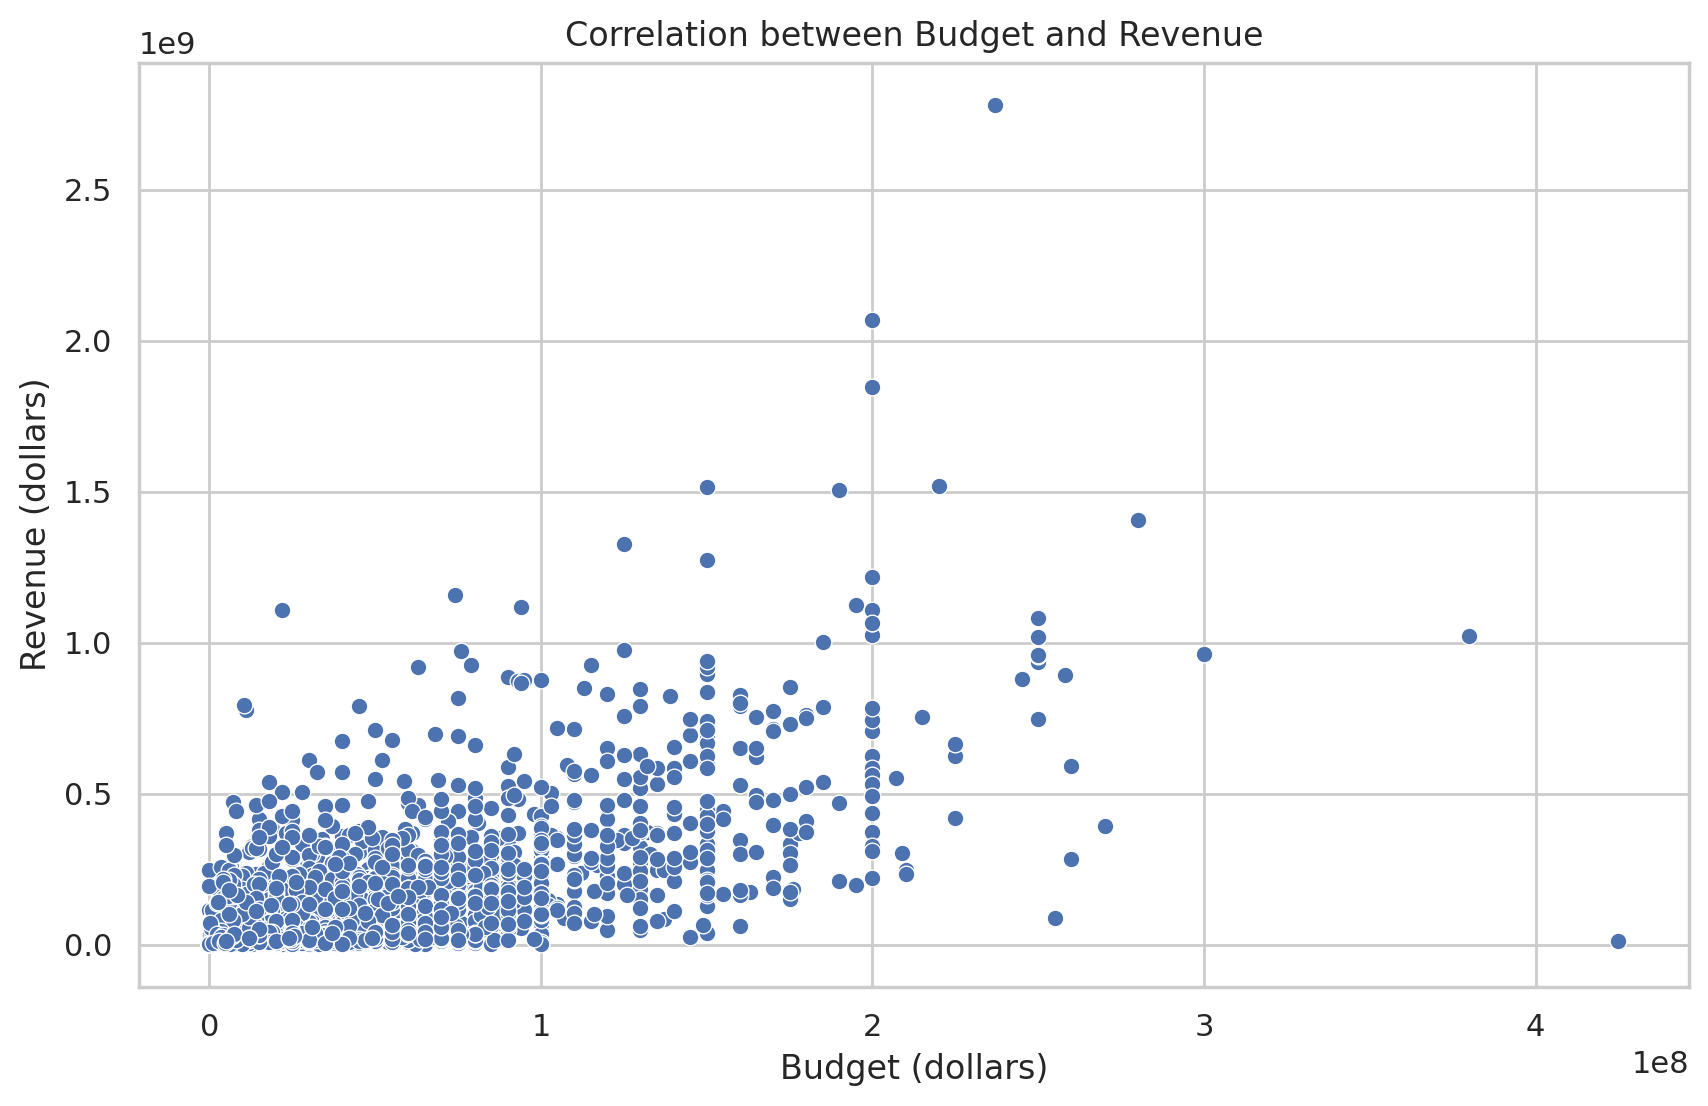

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Correlation between Budget and Revenue')
plt.xlabel('Budget (dollars)')
plt.ylabel('Revenue (dollars)')
plt.show()


<a id='conclusions'></a>
## Conclusions


For a Movie in order to be considered in a successful criteria

 - Average Budget must be around 60 millon dollar.

 - Average duration of the movie must be 113 minutes.

 - Any one of these actors should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz.

 - Genre: Action, Adventure, Thriller, Comedy, Drama.

 - By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.

One other point to note is that this research was conducted with an eye toward the films that made a substantial profit—roughly $50 million. While it may not be flawless, heeding these recommendations might boost the likelihood that a film will be a box office success. Furthermore, we are unsure if the information supplied to us is accurate and current. It is possible that various movies have different budgets in different currencies depending on the country in which they are produced, as previously indicated because the budget and income columns do not contain a currency unit. Thus, there is a discrepancy that could make the entire analysis incorrect. Eliminating the rows that lacked values had an impact on the analysis as a whole.

1. **Revenue and Budget Distribution:**
   - The distribution of movie revenue is right-skewed, indicating that a few movies generate significantly higher revenue than the majority.
   - Movie budgets also exhibit a right-skewed distribution, with most movies having relatively lower budgets.

2. **Genre Trends:**
   - The most prevalent movie genres include Drama, Comedy, and Action.
   - Genre popularity has evolved over the years, with certain genres gaining or losing prominence.

3. **Cast and Revenue:**
   - Certain actors and actresses appear more frequently in the dataset, suggesting potential star power.
   - Further analysis is needed to explore the correlation between specific cast members and high movie revenue.

4. **Budget and Revenue Relationship:**
   - A positive correlation exists between movie budgets and revenue, indicating that higher-budget movies tend to generate more revenue.
   - However, other factors may influence revenue, and a more detailed analysis is required.


5. **Profit Analysis:**
    - Movie with ID 1386 shows the highest earned profit i.e $2544505847.
    - Movie with ID 2244 shows the lowest earned profit i.e -413912431


6. **Most Profitable Year:**
    - The most profitable year was 2015 with a total profit of $19,032,145,273.00

7. **Genre Popularity Over Time:**
    - The analysis of genre popularity over the years provides a dynamic view of audience preferences and industry trends.

**Recommendations:**
- Consider exploring more advanced machine learning models for revenue prediction.
- Conduct deeper analysis on outlier movies to understand their impact on overall trends.
- Investigate the influence of specific cast members and directors on movie success.
- Stay updated on evolving genre preferences and market dynamics for strategic decision-making in the film industry.

In [71]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 2827239 bytes to Investigate_a_Dataset.html
